In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import time
import sklearn
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
from random import random
from tabulate import tabulate
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import ExtraTreeClassifier
from contextlib import redirect_stdout
evaluate={'Acc':"Accuracy", 'b_Acc':"Balanced Accuracy", 'F1':"F1 Score", 'kap':"Kappa", 'ROC':"Roc"}

In [3]:
saat=time.time()

In [4]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [5]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

files_add=find_the_way("./",".csv")
files_add

['./session-1-DeviceGroup-1.csv',
 './session-1-DeviceGroup-2.csv',
 './session-2-DeviceGroup-1.csv',
 './session-2-DeviceGroup-2.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.duplicate-address-detected.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.duplicate-address-frame.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.hw.size.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.hw.type.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.isannouncement.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.isgratuitous.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.isprobe.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.opcode.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.proto.size.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.proto.type.csv',
 './results\\compare\\CV\\DT_CS1D1_arp.seconds-since-duplicate-address-frame.csv',
 './results\\compare\\CV\\DT_CS1D1_dhcp.flags.bc.csv',
 './results\\compare\\CV\\DT_CS1D1_dhcp.flags.csv',
 './results\\compare\\CV\\DT_CS1D1_dhcp.flags.reserved.csv',
 './results\\compare\\CV\\DT_CS

In [6]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier    
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import  ComplementNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier


from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

from sklearn import datasets
import sklearn
import time


from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import randint as sp_randint
from scipy.stats import randint as sp_randFloat
import xgboost
from catboost import CatBoostClassifier

In [7]:
ml_list={"DT": DecisionTreeClassifier(),
         "LR": LogisticRegression(),
         "BNB": BernoulliNB(),
       
         "XGB": xgboost.XGBClassifier(),
         "kNN": KNeighborsClassifier(),
         "GNB": GaussianNB(),
           "MLP": MLPClassifier(),"SVM": SVC()}

ml_list={"ET":ExtraTreeClassifier(),
"DT":DecisionTreeClassifier(),
#"OneClassSVM":OneClassSVM(),
#"MLPClassifier":MLPClassifier(),
#"ComplementNB":ComplementNB(),
###################"DummyClassifier":DummyClassifier(),         
#"RadiusNeighborsClassifier":RadiusNeighborsClassifier(),
#"KNeighborsClassifier":KNeighborsClassifier(),
#"ClassifierChain":ClassifierChain(base_estimator=DecisionTreeClassifier()),
#"MultiOutputClassifier":MultiOutputClassifier(estimator=DecisionTreeClassifier()),
#####################"OutputCodeClassifier":OutputCodeClassifier(estimator=DecisionTreeClassifier()),
#"OneVsOneClassifier":OneVsOneClassifier(estimator=DecisionTreeClassifier()),
#########################"OneVsRestClassifier":OneVsRestClassifier(estimator=DecisionTreeClassifier()),
#"SGDClassifier":SGDClassifier(),
#######################################"RidgeClassifierCV":RidgeClassifierCV(),
"Ridge":RidgeClassifier(),
############################"PassiveAggressiveClassifier    ":PassiveAggressiveClassifier    (),
#"GaussianProcessClassifier":GaussianProcessClassifier(),
#"AdaBoostClassifier":AdaBoostClassifier(),
#"GradientBoostingClassifier":GradientBoostingClassifier(),
"Bagg":BaggingClassifier(),
"ETs":ExtraTreesClassifier(),
"RF":RandomForestClassifier(),
"BNB":BernoulliNB(),
##############"CalibratedClassifierCV":CalibratedClassifierCV(),
"GNB":GaussianNB(),
#"LabelPropagation":LabelPropagation(),
#"LabelSpreading":LabelSpreading(),
"LDA":LinearDiscriminantAnalysis(),
#"LinearSVC":LinearSVC(),
"LR":LogisticRegression(),
#"LogisticRegressionCV":LogisticRegressionCV(),
#"MultinomialNB  ":MultinomialNB  (),
#########################################"NearestCentroid":NearestCentroid(),
#"NuSVC":NuSVC(),
##############################################"Perceptron":Perceptron(),
"QDA":QuadraticDiscriminantAnalysis()}
#"SVC":SVC(),    #  "XGB": xgboost.XGBClassifier(),
         #"cat":CatBoostClassifier(),
#"HistGradientBoostingClassifier":HistGradientBoostingClassifier()}
#"CategoricalNB" : CategoricalNB()}

ml_list={"DT": DecisionTreeClassifier(),
       "Bagg":BaggingClassifier()}
ml_list={"DT": DecisionTreeClassifier()}

In [8]:
def target_name(name):
    df = pd.read_csv(name,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    return target_names

In [9]:
folder("results/compare/SS/")
folder("results/compare/CV/")
folder("results/compare/DD/")
folder("pdfs")

## Calculation of evaluations

In [10]:
def score(train_time,test_time,predict,y_test,class_based_results,repeat,cv,dname,ml,sw):
    train_time=train_time[0]
    test_time=test_time[0]
    rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
    pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
    f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")     
    accuracy=sklearn.metrics.accuracy_score(y_test, predict)
    accuracy_b=sklearn.metrics.balanced_accuracy_score( y_test,predict)
    kappa=sklearn.metrics.cohen_kappa_score(y_test, predict,labels=None, weights=None, sample_weight=None)
    try:
        roc=sklearn.metrics.roc_auc_score(y_test, predict)
    except:roc=0
    report = sklearn.metrics.classification_report(y_test, predict, target_names=target_names,output_dict=True)
    cr = pd.DataFrame(report).transpose()
    line=[dname,sw,repeat,cv,ml,accuracy,accuracy_b,pr,rc,f_1,kappa,roc,train_time,test_time]

    if class_based_results.empty:
        class_based_results =cr
    else:
        class_based_results = class_based_results.add(cr, fill_value=0)
    return class_based_results,line

In [11]:
def ML(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=5
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Feature","Dataset","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):
                try:

                    df = pd.read_csv(loop1,usecols=cols)#,header=None )
                    df=df.fillna(0)
                    X_train =df[df.columns[0:-1]]
                    X_train=np.array(X_train)
                    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
                    y_train=df[df.columns[-1]].cat.codes  
    
    
                    df = pd.read_csv(loop2,usecols=cols)#,header=None )
                    df=df.fillna(0)
                    X_test =df[df.columns[0:-1]]
                    X_test=np.array(X_test)
                    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
                    y_test=df[df.columns[-1]].cat.codes  
    
    
                    #dname=loop1  [6:-13]  
                    results_y=[]
           
                    results_y.append(y_test)
    
    
                    precision=[]
                    recall=[]
                    f1=[]
                    accuracy=[]
                    train_time=[]
                    test_time=[]
                    total_time=[]
                    kappa=[]
                    accuracy_b=[]
    
                        #machine learning algorithm is applied in this section
                    clf = ml_list[ii]#choose algorithm from ml_list dictionary
                    second=time.time()
                    clf.fit(X_train, y_train)
                    train_time.append(float((time.time()-second)) )
                    second=time.time()
                    predict =clf.predict(X_test)
                    test_time.append(float((time.time()-second)) )
        
                    altime=0
                    class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                    lines.append(line)
                except:pass
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        #print(results)
        del results["Feature"]
        del results["Dataset"]
        del results["ML"]
        del results["T"]
        del results["CV"]
        del results["ROC"]
        #print(results)
        results=results.mean()
        results=results.round(3)
        list1 = [train,cols[0][:15],ii]
        list1.extend(list(results.values))
  
        
        print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero, list1[0],
            list1[1],   
            list1[2][:5],
            list1[3],
            list1[4],
            list1[5],   
            list1[6],
            list1[7],
            list1[8],
            list1[9],   
            list1[10]))

        #print (tabulate(results, headers=list(results.columns)))
        #print()






In [12]:
def ML_CV(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=1
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Feature","Dataset","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):
            rnd = random()
            kfold = sklearn.model_selection.KFold(n_splits=fold, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            ##df = df.reset_index(drop=True)
            df=df.fillna(0)

            #del df["MAC"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            X.shape
            for train_index, test_index in kfold.split(X):
                try:
                    X_train, X_test = X[train_index], X[test_index]
                    y_train, y_test = y[train_index], y[test_index]  
    
                    #dname=loop1  [6:-13]  
                    results_y=[]
                    cv+=1
                    results_y.append(y_test)
    
    
                    precision=[]
                    recall=[]
                    f1=[]
                    accuracy=[]
                    train_time=[]
                    test_time=[]
                    total_time=[]
                    kappa=[]
                    accuracy_b=[]
    
                        #machine learning algorithm is applied in this section
                    clf = ml_list[ii]#choose algorithm from ml_list dictionary
                    second=time.time()
                    clf.fit(X_train, y_train)
                    train_time.append(float((time.time()-second)) )
                    second=time.time()
                    predict =clf.predict(X_test)
                    test_time.append(float((time.time()-second)) )
        
                    altime=0
                    class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                    lines.append(line)
                except:pass
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        #print(results)
        del results["Feature"]
        del results["Dataset"]
        del results["ML"]
        del results["T"]
        del results["CV"]
        del results["ROC"]
        #print(results)
        results=results.mean()
        results=results.round(3)
        list1 = [file_list[loop1],cols[0][:15],ii]
        list1.extend(list(results.values))
  
        
        print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero, list1[0],
            list1[1],   
            list1[2][:5],
            list1[3],
            list1[4],
            list1[5],   
            list1[6],
            list1[7],
            list1[8],
            list1[9],   
            list1[10]))

        #print (tabulate(results, headers=list(results.columns)))
        #print()






In [13]:
features=['dns.time', 'http.time', 'icmp.data_time_relative', 'icmp.resptime', 'stun.time', 'tcp.ack', 'tcp.ack_raw', 'tcp.analysis.ack_rtt', 'tcp.analysis.initial_rtt', 'tcp.analysis.rto', 'tcp.nxtseq', 'tcp.options.timestamp.tsecr', 'tcp.options.timestamp.tsval', 'tcp.seq', 'tcp.seq_raw', 'tcp.time_delta', 'tcp.time_relative', 'udp.time_delta', 'udp.time_relative', 'arp.hw.size', 'arp.hw.type', 'arp.isannouncement', 'arp.isgratuitous', 'arp.isprobe', 'arp.opcode', 'arp.proto.size', 'arp.seconds-since-duplicate-address-frame', 'dhcp.flags.bc', 'dhcp.hops', 'dhcp.hw.addr_padding', 'dhcp.hw.len', 'dhcp.option.dhcp', 'dhcp.option.dhcp_max_message_size', 'dhcp.option.end', 'dhcp.option.interface_mtu', 'dhcp.option.ip_address_lease_time', 'dhcp.option.padding', 'dhcp.option.rebinding_time_value', 'dhcp.option.renewal_time_value', 'dhcp.secs', 'dhcp.type', 'dns.count.add_rr', 'dns.count.answers', 'dns.count.auth_rr', 'dns.count.queries', 'dns.extraneous', 'dns.extraneous.data', 'dns.extraneous.length', 'dns.flags.authenticated', 'dns.flags.authoritative', 'dns.flags.checkdisable', 'dns.flags.opcode', 'dns.flags.rcode', 'dns.flags.recavail', 'dns.flags.recdesired', 'dns.flags.response', 'dns.flags.truncated', 'dns.flags.z', 'dns.response_to', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'dns.retransmit_response', 'dns.retransmit_response_in', 'dns.soa.expire_limit', 'dns.soa.minimum_ttl', 'dns.soa.refresh_interval', 'dns.soa.retry_interval', 'dns.soa.serial_number', 'dns.unsolicited', 'eapol.keydes.key_iv', 'eapol.keydes.key_len', 'eapol.keydes.replay_counter', 'eapol.keydes.type', 'eapol.len', 'eapol.type', 'eapol.version', 'eth.dst.ig', 'eth.dst.lg', 'eth.dst.oui', 'eth.fcs.status', 'eth.len', 'eth.padding', 'eth.padding_bad', 'eth.src.ig', 'eth.src.lg', 'eth.src.oui', 'http.chat', 'http.content_length', 'http.content_length_header', 'http.notification', 'http.prev_request_in', 'http.prev_response_in', 'http.request', 'http.request_in', 'http.request_number', 'http.response', 'http.response.code', 'http.response_number', 'icmp.checksum.status', 'icmp.code', 'icmp.ident', 'icmp.ident_le', 'icmp.resp_to', 'icmp.seq', 'icmp.seq_le', 'icmp.type', 'icmp.unused', 'icmpv6.checksum.status', 'icmpv6.code', 'icmpv6.mldr.nb_mcast_records', 'icmpv6.opt', 'icmpv6.opt.length', 'icmpv6.opt.type', 'icmpv6.reserved', 'icmpv6.type', 'igmp.checksum.status', 'igmp.max_resp', 'igmp.num_grp_recs', 'igmp.version', 'ip.bogus_ip_length', 'ip.len', 'ip.opt.len', 'ip.opt.ra', 'ip.opt.type', 'ip.opt.type.class', 'ip.opt.type.copy', 'ip.opt.type.number', 'ntp.flags.li', 'ntp.flags.mode', 'ntp.flags.vn', 'ntp.ppoll', 'ntp.precision', 'ntp.rootdelay', 'ntp.rootdispersion', 'ntp.stratum', 'stun.att.crc32.status', 'stun.att.error', 'stun.att.error.class', 'stun.att.lifetime', 'stun.attributes', 'stun.length', 'stun.network_version', 'stun.response-to', 'tcp.analysis', 'tcp.analysis.ack_lost_segment', 'tcp.analysis.acks_frame', 'tcp.analysis.bytes_in_flight', 'tcp.analysis.duplicate_ack_frame', 'tcp.analysis.duplicate_ack_num', 'tcp.analysis.flags', 'tcp.analysis.keep_alive', 'tcp.analysis.keep_alive_ack', 'tcp.analysis.lost_segment', 'tcp.analysis.out_of_order', 'tcp.analysis.push_bytes_sent', 'tcp.analysis.retransmission', 'tcp.analysis.reused_ports', 'tcp.analysis.rto_frame', 'tcp.analysis.spurious_retransmission', 'tcp.analysis.window_update', 'tcp.checksum.status', 'tcp.completeness', 'tcp.connection.fin', 'tcp.connection.fin_active', 'tcp.connection.fin_passive', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.fin_retransmission', 'tcp.flags.ack', 'tcp.flags.ae', 'tcp.flags.cwr', 'tcp.flags.ece', 'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.res', 'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.urg', 'tcp.hdr_len', 'tcp.len', 'tcp.options.mss_val', 'tcp.options.sack.count', 'tcp.options.sack.dsack', 'tcp.options.sack.dsack_le', 'tcp.options.sack.dsack_re', 'tcp.options.sack_le', 'tcp.options.sack_perm', 'tcp.options.sack_re', 'tcp.options.wscale.multiplier', 'tcp.options.wscale.shift', 'tcp.pdu.size', 'tcp.reassembled.length', 'tcp.segment.count', 'tcp.segment.overlap', 'tcp.segments', 'tcp.srcport', 'tcp.stream', 'tcp.urgent_pointer', 'tcp.window_size', 'tcp.window_size_scalefactor', 'tcp.window_size_value', 'tls.alert_message', 'tls.change_cipher_spec', 'tls.handshake.certificates', 'tls.handshake.certificates_length', 'tls.handshake.challenge', 'tls.handshake.challenge_length', 'tls.handshake.cipher_spec_len', 'tls.handshake.cipher_suites_length', 'tls.handshake.ciphersuites', 'tls.handshake.client_point_len', 'tls.handshake.comp_method', 'tls.handshake.comp_methods', 'tls.handshake.comp_methods_length', 'tls.handshake.epms_len', 'tls.handshake.extension.heartbeat.mode', 'tls.handshake.extensions_ec_point_formats', 'tls.handshake.extensions_ec_point_formats_length', 'tls.handshake.extensions_length', 'tls.handshake.extensions_reneg_info_len', 'tls.handshake.extensions_server_name_len', 'tls.handshake.extensions_server_name_list_len', 'tls.handshake.extensions_server_name_type', 'tls.handshake.extensions_supported_groups', 'tls.handshake.extensions_supported_groups_length', 'tls.handshake.g_len', 'tls.handshake.p_len', 'tls.handshake.server_point_len', 'tls.handshake.session_id_length', 'tls.handshake.session_ticket_length', 'tls.handshake.session_ticket_lifetime_hint', 'tls.handshake.sig_hash_alg_len', 'tls.handshake.sig_hash_algs', 'tls.handshake.sig_len', 'tls.handshake.yc_len', 'tls.handshake.ys_len', 'tls.resumed', 'tls.sct.scts_length', 'udp.checksum.status', 'udp.dstport', 'udp.length', 'udp.length.bad', 'udp.possible_traceroute', 'udp.srcport', 'udp.stream', 'eth.dst', 'eth.src', '_ws.col.Destination', '_ws.col.Source', 'stun.cookie', 'stun.id', 'stun.value', 'tcp.options', 'tcp.options.mss', 'tcp.options.sack', 'tcp.options.wscale', 'ntp.refid', 'stun.att.username', 'arp.proto.type', 'dhcp.flags', 'dhcp.flags.reserved', 'dhcp.id', 'dns.flags', 'dns.id', 'eth.fcs', 'eth.type', 'icmp.checksum', 'icmpv6.checksum', 'igmp.checksum', 'igmp.type', 'ip.id', 'ipv6.flow', 'ipv6.tclass', 'ntp.flags', 'stun.att.crc32', 'stun.att.transp', 'stun.type', 'stun.type.class', 'stun.type.method', 'stun.type.method-assignment', 'tcp.checksum', 'tcp.flags', 'tls.handshake.server_curve_type', 'tls.handshake.server_named_curve', 'tls.handshake.version', 'udp.checksum', 'http.connection', 'http.request.method', 'http.request.uri.path', 'http.response.code.desc', 'http.response.phrase', 'dns.srv.proto', 'tcp.flags.str', '_ws.col.Protocol', 'tls.handshake.sig_hash_alg', 'dhcp.hw.type', 'ip.dsfield', 'ip.flags', 'ipv6.opt.type', 'ipv6.opt.type.rest', 'stun.att.family', 'stun.att.ipv4-xord', 'stun.att.port-xord', 'tcp.segment', 'arp.duplicate-address-detected', 'arp.duplicate-address-frame', 'dns.srv.port', 'dns.srv.priority', 'dns.srv.weight', 'eth.addr.oui', 'eth.ig', 'eth.lg', 'ip.checksum.status', 'ip.dsfield.dscp', 'ip.dsfield.ecn', 'ip.flags.df', 'ip.flags.mf', 'ip.flags.rb', 'ip.frag_offset', 'ip.hdr_len', 'ip.proto', 'ip.ttl', 'ip.version', 'ipv6.opt', 'ipv6.opt.length', 'ipv6.opt.type.action', 'ipv6.opt.type.change', 'stun.att.padding', 'stun.att.port', 'stun.att.reserved', 'tcp.analysis.duplicate_ack', 'tcp.port', 'tls.record.length', 'udp.port', 'ip.dst', 'ip.src', 'ip.src_host', 'stun.att.ipv4', 'dhcp.hw.mac_addr', 'Payload_Entropy', 'dstport', 'srcport', 'dstport_class', 'srcport_class']
print(len(features))

347


In [14]:
file_list={'./session-1-DeviceGroup-1.csv':"CS1D1",
 './session-1-DeviceGroup-2.csv':"CS1D2",
 './session-2-DeviceGroup-1.csv':"CS2D1",
 './session-2-DeviceGroup-2.csv':"CS2D2"}

# CV

In [15]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(train,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/CV/ML_{file_list[train]}_{dname}.csv"
            #print(f"{list[train]} Dataset - Feature {number+1}/{len(features)}")
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            ML_CV(train,"",output_csv,feature,dname,file_list[train])
            
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorCV.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {list[train]} Dataset - Feature {dname}")
                    df = pd.read_csv(train,usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")

No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   CS1D1      dns.time        DT         0.396      0.084      0.214      0.084      0.049      0.0        0.018      0.004     
001   CS1D1      http.time       DT         0.396      0.083      0.1        0.083      0.047      0.0        0.016      0.004     
002   CS1D1      icmp.data_time_ DT         0.396      0.084      0.1        0.084      0.049      0.0        0.02       0.003     
003   CS1D1      icmp.resptime   DT         0.396      0.083      0.066      0.083      0.047      0.0        0.016      0.006     
004   CS1D1      stun.time       DT         0.396      0.083      0.033      0.083      0.047      0.0        0.017      0.003     
005   CS1D1      tcp.ack         DT         0.583      0.271      0.427      0.271      0.294      0.378      0.218      0.007     
006   CS1D1      tcp.ack_raw     DT         0.657      0.374      0.788     

In [16]:
time.time()-saat

9064.367666244507

# Session vs Session

In [17]:
file_list={"SD1":['./small/session-1-DeviceGroup-1.csv','./small/session-2-DeviceGroup-1.csv'],
"SD1T":['./small/session-2-DeviceGroup-1.csv','./small/session-1-DeviceGroup-1.csv'],
"SD2":['./small/session-1-DeviceGroup-2.csv','./small/session-2-DeviceGroup-2.csv'],
"SD2T":['./small/session-2-DeviceGroup-2.csv','./small/session-1-DeviceGroup-2.csv']}


In [18]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(file_list[train][0],usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/SS/ML_{train}_{dname}.csv"
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            temp=ML(file_list[train][0],file_list[train][1],output_csv,feature,dname,train)  
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorSS.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {train} Dataset - Feature {dname}")
                    print("TRAIN")
                    df = pd.read_csv(file_list[train][0],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("TEST")
                    df = pd.read_csv(file_list[train][1],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")


No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   SD1        dns.time        DT         0.383      0.083      0.115      0.083      0.046      0.0        0.003      0.0       
001   SD1        http.time       DT         0.382      0.083      0.032      0.083      0.046      0.0        0.004      0.003     
002   SD1        icmp.data_time_ DT         0.383      0.084      0.115      0.084      0.048      0.0        0.006      0.0       
003   SD1        icmp.resptime   DT         0.382      0.083      0.032      0.083      0.046      0.0        0.0        0.002     
004   SD1        stun.time       DT         0.382      0.083      0.032      0.083      0.046      0.0        0.003      0.003     
005   SD1        tcp.ack         DT         0.445      0.22       0.288      0.22       0.216      0.166      0.018      0.006     
006   SD1        tcp.ack_raw     DT         0.388      0.113      0.105     

In [19]:
time.time()-saat

17595.179814100266

# Device vs Device

In [20]:
file_list={"DD1":['./small/session-1-DeviceGroup-1.csv','./small/session-2-DeviceGroup-2.csv'],
"DD1T":['./small/session-2-DeviceGroup-2.csv','./small/session-1-DeviceGroup-1.csv'],
"DD2":['./small/session-2-DeviceGroup-1.csv','./small/session-1-DeviceGroup-2.csv'],
"DD2T":['./small/session-1-DeviceGroup-2.csv','./small/session-2-DeviceGroup-1.csv']}

In [21]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(file_list[train][0],usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/DD/ML_{train}_{dname}.csv"
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            temp=ML(file_list[train][0],file_list[train][1],output_csv,feature,dname,train)  
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorDD.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {train} Dataset - Feature {dname}")
                    print("TRAIN")
                    df = pd.read_csv(file_list[train][0],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("TEST")
                    df = pd.read_csv(file_list[train][1],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")



No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   DD1        dns.time        DT         0.065      0.083      0.089      0.083      0.01       0.0        0.012      0.0       
001   DD1        http.time       DT         0.065      0.083      0.005      0.083      0.01       0.0        0.004      0.006     
002   DD1        icmp.data_time_ DT         0.065      0.083      0.005      0.083      0.01       0.0        0.0        0.002     
003   DD1        icmp.resptime   DT         0.065      0.083      0.005      0.083      0.01       0.0        0.005      0.0       
004   DD1        stun.time       DT         0.065      0.083      0.005      0.083      0.01       0.0        0.003      0.0       
005   DD1        tcp.ack         DT         0.234      0.171      0.168      0.171      0.106      0.075      0.021      0.003     
006   DD1        tcp.ack_raw     DT         0.15       0.107      0.079     

In [22]:
time.time()-saat

26150.010285377502

# Some analysis and graphs for feature elimination

In [41]:
csv_results={}
for f in ["CV","SS","DD"]:
    files_add=find_the_way(f"./results\\compare\\{f}",".csv")
    csv_results[f]=[]
    for i in files_add:
        temp=i.replace("\\","/")
        temp=temp.split("_")
        if f"_{temp[1]}_" not in csv_results[f]:
            csv_results[f].append(f"_{temp[1]}_" )

In [42]:
csv_results={'CV': ['_CS1D1_', '_CS1D2_', '_CS2D1_', '_CS2D2_'],
 'SS': ['_SD1T_', '_SD1_', '_SD2T_', '_SD2_'],
 'DD': ['_DD1T_', '_DD1_', '_DD2T_', '_DD2_']}

In [43]:
for f in csv_results:
    folder(f"./results/mean/{f}/")
    for s in csv_results[f]:
        results=[['Feature', 'Dataset', "Folder", 'T', 'CV', 'Acc', 'b_Acc', 'Prec', 'Rec',
       'F1', 'kap', 'ROC', 'tra-T', 'test-T']]
        temp=find_the_way(f"./results/compare/{f}",s)
        files_add=[]
        for i in temp:
            files_add.append(i.replace("\\","/"))
            
            
        for i in tqdm(files_add):
            df=pd.read_csv(i)

            temp=df.values
            df = df.apply(pd.to_numeric, errors='coerce')
            df=df.mean()

            df = df.dropna()
            try:
                temp=list(temp[0][:2])
            except:
                temp=[i[i.find(s)+len(s)+1:-4]]
                temp.append(s)
            temp.append(f)
            temp.extend(list(df.values))
            results.append(temp)
        results = pd.DataFrame (results[1:], columns = results[0])
        results.to_csv(f"./results/mean/{f}/{s[1:-1]}.csv",index=False)
        

100%|███████████████████████████████████████████████████████████████████████████████| 347/347 [00:01<00:00, 237.77it/s]


In [44]:
csv_results={'CV': ['_CS1D1_', '_CS1D2_', '_CS2D1_', '_CS2D2_'],
 'SS': ['_SD1T_', '_SD1_', '_SD2T_', '_SD2_'],
 'DD': ['_DD1T_', '_DD1_', '_DD2T_', '_DD2_']}

In [45]:
flag=1
totaldf=pd.DataFrame()
for i in csv_results:
    tempdf=pd.DataFrame()
    files_add=find_the_way(f"./results/mean/{i}",".csv")
    for n, ii in enumerate(files_add):
        df=pd.read_csv(ii,usecols=["Feature","kap"])
        if flag:
            totaldf["Feature"]=df["Feature"]
            flag=0
        del df["Feature"]
        tempdf[f"{i}_{n}"]=df["kap"]
    totaldf[i]=tempdf.mean(axis=1)
totaldf




Feature        CV        SS        DD
0    arp.duplicate-address-detected  0.000000  0.000000  0.000000
1       arp.duplicate-address-frame  0.000000  0.000000  0.000000
2                       arp.hw.size  0.056699  0.042733  0.046171
3                       arp.hw.type  0.056698  0.042733  0.046171
4                arp.isannouncement  0.063027  0.062805  0.021762
..                              ...       ...       ...       ...
342                  udp.time_delta  0.293297  0.236293  0.155038
343               udp.time_relative  0.214124  0.225018  0.134769
344              ws.col.Destination       NaN       NaN       NaN
345                _ws.col.Protocol  0.225219  0.192373  0.106489
346                   ws.col.Source       NaN       NaN       NaN

[347 rows x 4 columns]

In [53]:
cleandf=[list(totaldf.columns)]
limit=0.00001
for i in totaldf.values:
    if (math.isnan(i[1]) and math.isnan(i[2]) and math.isnan(i[3]) ) or (i[1]<limit and i[2]<limit  and i[3]<limit   ):
        print(i)
    else:
        cleandf.append(list(i))
cleandf = pd.DataFrame (cleandf[1:], columns = cleandf[0])   
print(len(cleandf))
cleandf

['arp.duplicate-address-detected' 0.0 0.0 0.0]
['arp.duplicate-address-frame' 0.0 0.0 0.0]
['arp.isprobe' 0.0 0.0 0.0]
['arp.seconds-since-duplicate-address-frame' 0.0 0.0 0.0]
['hcp.hw.mac_addr' nan nan nan]
['dhcp.option.interface_mtu' 0.0 0.0 0.0]
['dhcp.option.ip_address_lease_time' 6.30760540616393e-06 0.0 0.0]
['dhcp.option.rebinding_time_value' 6.261434521426246e-06 0.0 0.0]
['dhcp.option.renewal_time_value' 0.0 0.0 0.0]
['dns.extraneous' 0.0 0.0 0.0]
['dns.extraneous.data' 0.0 0.0 0.0]
['dns.extraneous.length' 0.0 0.0 0.0]
['dns.soa.expire_limit' 0.0 0.0 0.0]
['dns.soa.minimum_ttl' 0.0 0.0 0.0]
['dns.soa.refresh_interval' 0.0 0.0 0.0]
['dns.soa.retry_interval' 0.0 0.0 0.0]
['dns.soa.serial_number' 0.0 0.0 0.0]
['th.dst' nan nan nan]
['eth.fcs' 0.0 0.0 0.0]
['eth.fcs.status' 0.0 0.0 0.0]
['th.src' nan nan nan]
['eth.src.ig' 0.0 0.0 0.0]
['http.notification' 0.0 0.0 0.0]
['igmp.max_resp' 0.0 0.0 0.0]
['p.dst' nan nan nan]
['p.src' nan nan nan]
['p.src_host' nan nan nan]
['stun.at

Feature        CV        SS        DD
0           arp.hw.size  0.056699  0.042733  0.046171
1           arp.hw.type  0.056698  0.042733  0.046171
2    arp.isannouncement  0.063027  0.062805  0.021762
3      arp.isgratuitous  0.062797  0.062805  0.021762
4            arp.opcode  0.049288  0.036978  0.045025
..                  ...       ...       ...       ...
277         udp.srcport  0.424708  0.394601  0.176468
278          udp.stream  0.421558  0.029048  0.047897
279      udp.time_delta  0.293297  0.236293  0.155038
280   udp.time_relative  0.214124  0.225018  0.134769
281    _ws.col.Protocol  0.225219  0.192373  0.106489

[282 rows x 4 columns]

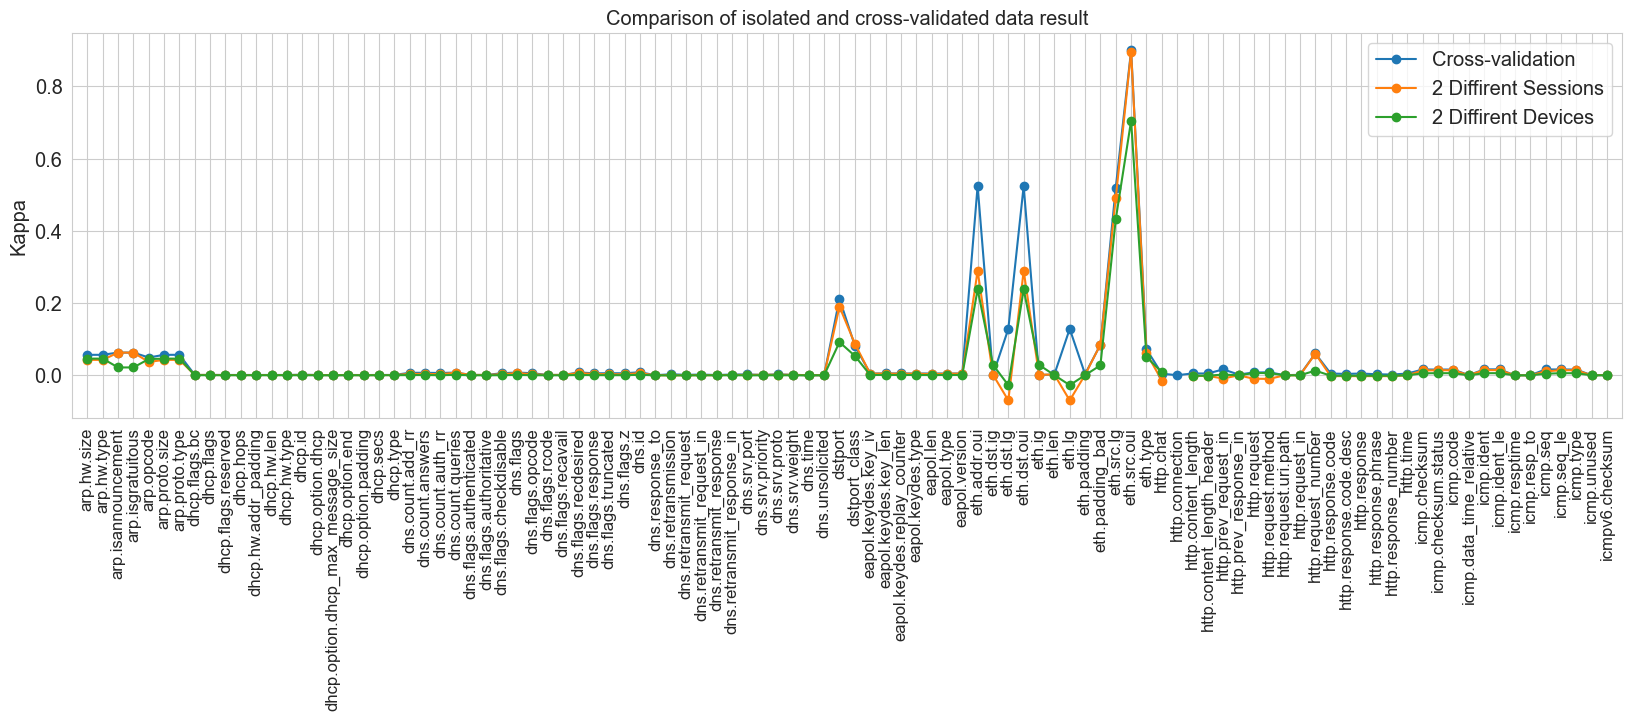

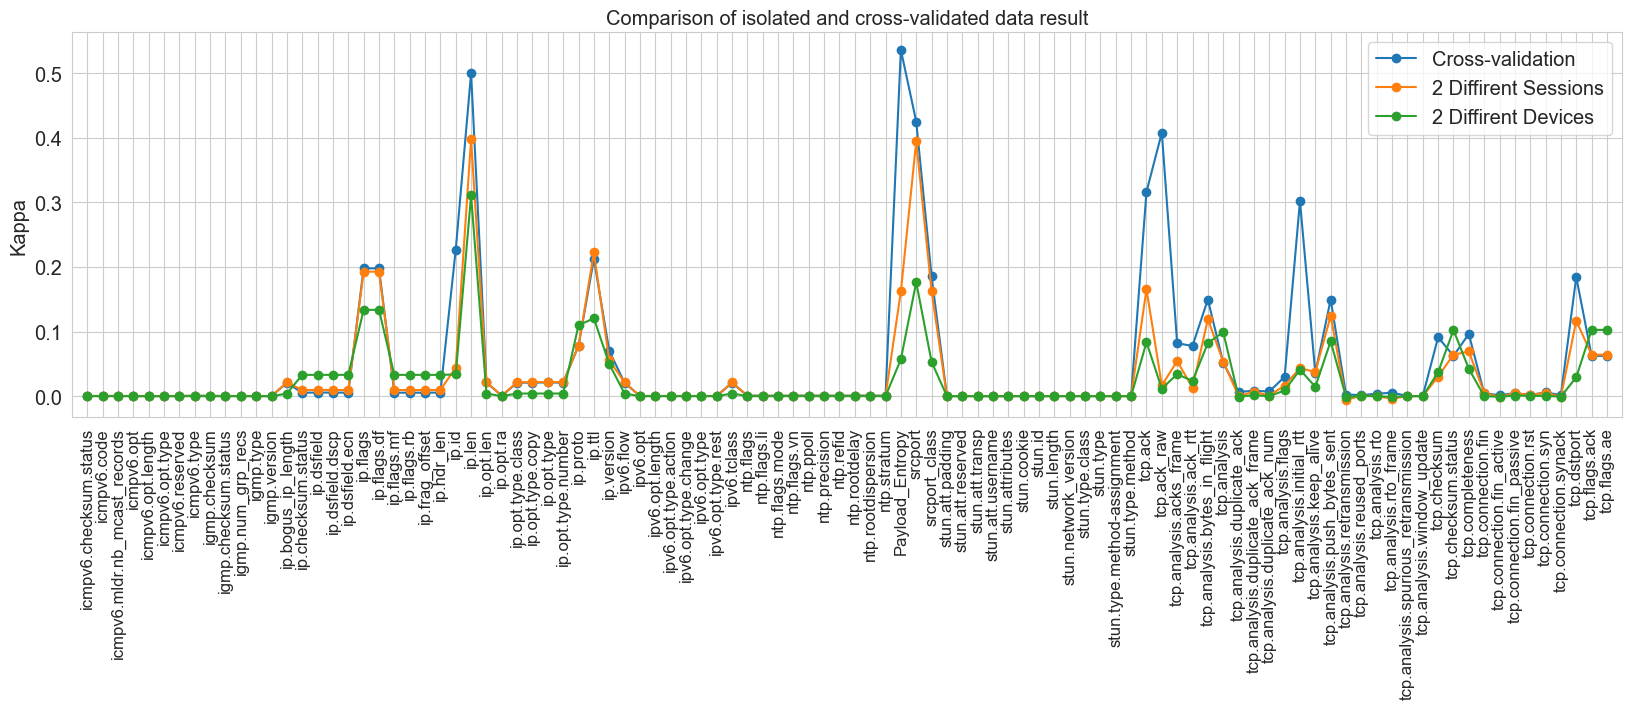

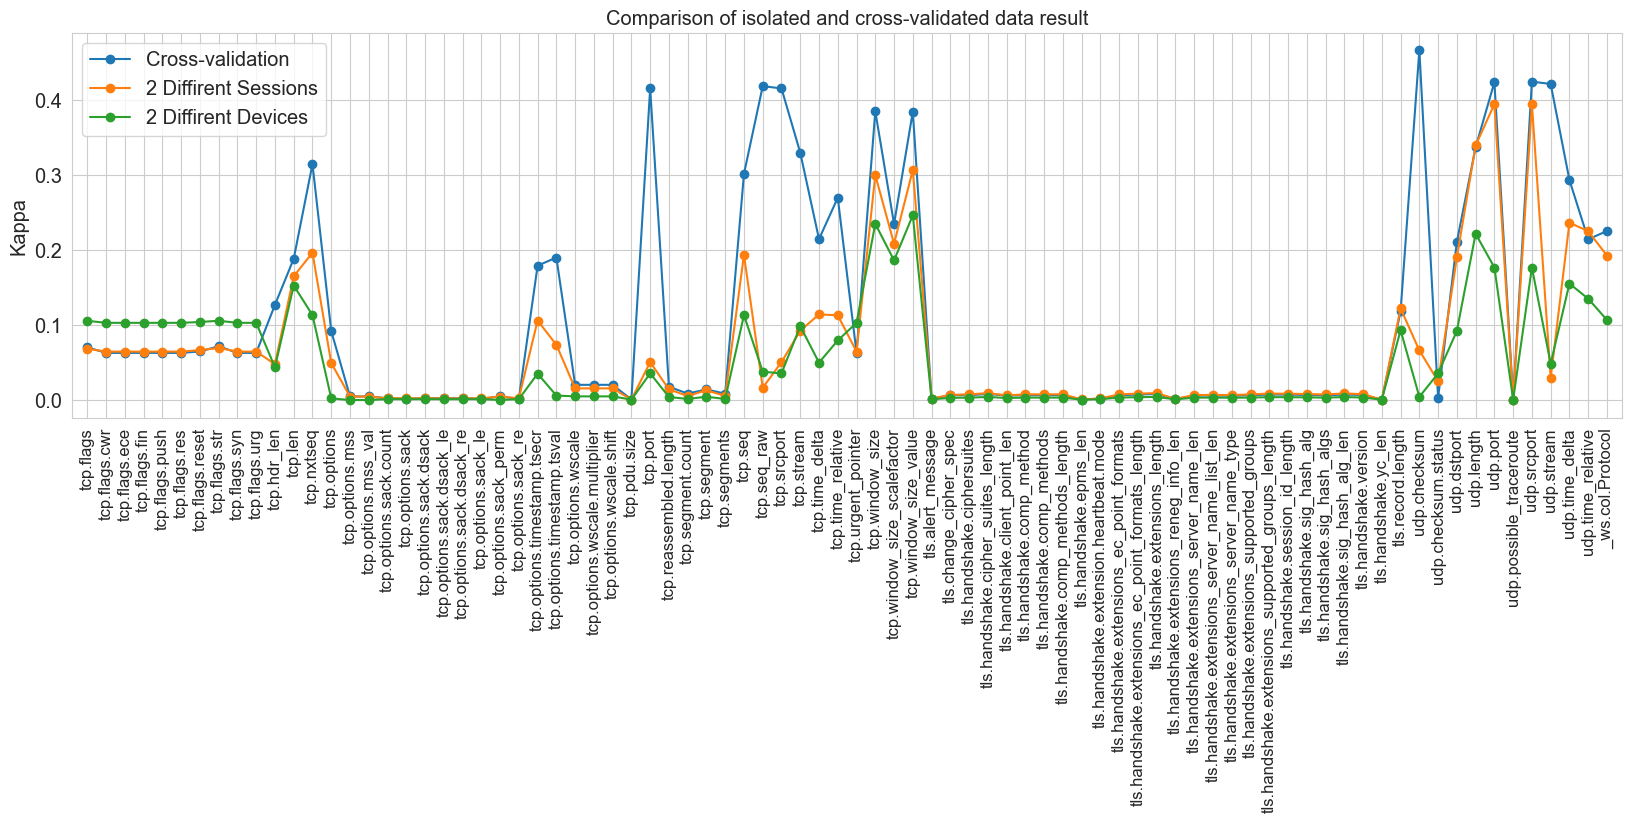

In [54]:
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
import matplotlib.pylab as pylab
sns.set_style("whitegrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'x-large'}
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
graph_size=100
for size in range(0,len(cleandf),graph_size):
    df = cleandf.iloc[size:size+graph_size,:]
    for i in method: 
            graph_name=f"./pdfs/Comparison_kappa(3)_{i}_{size}.pdf"
            plt.margins(x=0.01)
            my_xticks=df["Feature"]#list(iso.index)
            pylab.rcParams.update(params)
            #plt.figure(figsize=(10,10))
            #plt.plot(my_xticks,iso['Acc'], linestyle='--', marker='.', color='b',label= "Separate Train & Test acc")
            #plt.plot(my_xticks,cv['Acc'], linestyle='--', marker='.', color='r',label= "10-Fold CV acc")
            plt.plot(my_xticks,df[i], linestyle='-', marker='o',label= method[i])
    plt.title(f"Comparison of isolated and cross-validated data result")
    plt.legend(numpoints=1)
    #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.ylabel("Kappa")
    plt.xticks(rotation=90) 
    #plt.ylim([0.69, 0.71]) 
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()
        
    

In [55]:
cleandf=[list(totaldf.columns)]
limit=0.00001
for i in totaldf.values:
    if (math.isnan(i[1]) and math.isnan(i[2]) and math.isnan(i[3]) ) or (i[1]<limit and i[2]<limit  and i[3]<limit   ):
        print(i)
    else:
        cleandf.append(list(i))
cleandf = pd.DataFrame (cleandf[1:], columns = cleandf[0])   
print(len(cleandf))
cleandf

['arp.duplicate-address-detected' 0.0 0.0 0.0]
['arp.duplicate-address-frame' 0.0 0.0 0.0]
['arp.isprobe' 0.0 0.0 0.0]
['arp.seconds-since-duplicate-address-frame' 0.0 0.0 0.0]
['hcp.hw.mac_addr' nan nan nan]
['dhcp.option.interface_mtu' 0.0 0.0 0.0]
['dhcp.option.ip_address_lease_time' 6.30760540616393e-06 0.0 0.0]
['dhcp.option.rebinding_time_value' 6.261434521426246e-06 0.0 0.0]
['dhcp.option.renewal_time_value' 0.0 0.0 0.0]
['dns.extraneous' 0.0 0.0 0.0]
['dns.extraneous.data' 0.0 0.0 0.0]
['dns.extraneous.length' 0.0 0.0 0.0]
['dns.soa.expire_limit' 0.0 0.0 0.0]
['dns.soa.minimum_ttl' 0.0 0.0 0.0]
['dns.soa.refresh_interval' 0.0 0.0 0.0]
['dns.soa.retry_interval' 0.0 0.0 0.0]
['dns.soa.serial_number' 0.0 0.0 0.0]
['th.dst' nan nan nan]
['eth.fcs' 0.0 0.0 0.0]
['eth.fcs.status' 0.0 0.0 0.0]
['th.src' nan nan nan]
['eth.src.ig' 0.0 0.0 0.0]
['http.notification' 0.0 0.0 0.0]
['igmp.max_resp' 0.0 0.0 0.0]
['p.dst' nan nan nan]
['p.src' nan nan nan]
['p.src_host' nan nan nan]
['stun.at

Feature        CV        SS        DD
0           arp.hw.size  0.056699  0.042733  0.046171
1           arp.hw.type  0.056698  0.042733  0.046171
2    arp.isannouncement  0.063027  0.062805  0.021762
3      arp.isgratuitous  0.062797  0.062805  0.021762
4            arp.opcode  0.049288  0.036978  0.045025
..                  ...       ...       ...       ...
277         udp.srcport  0.424708  0.394601  0.176468
278          udp.stream  0.421558  0.029048  0.047897
279      udp.time_delta  0.293297  0.236293  0.155038
280   udp.time_relative  0.214124  0.225018  0.134769
281    _ws.col.Protocol  0.225219  0.192373  0.106489

[282 rows x 4 columns]

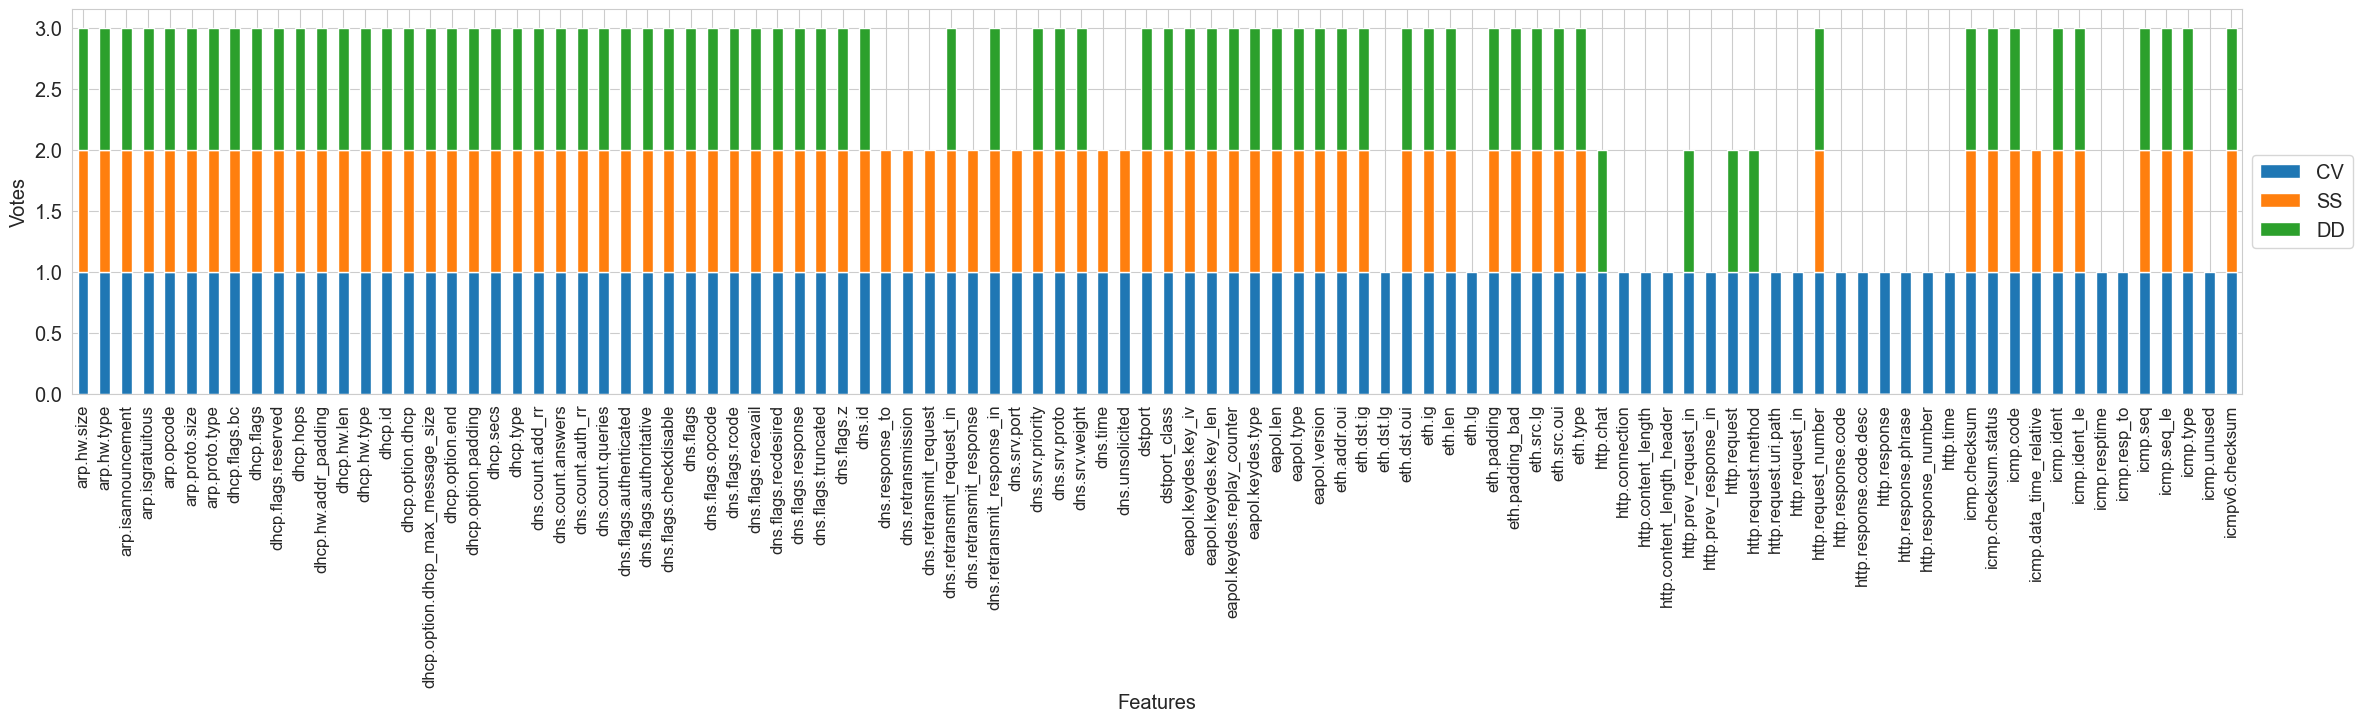

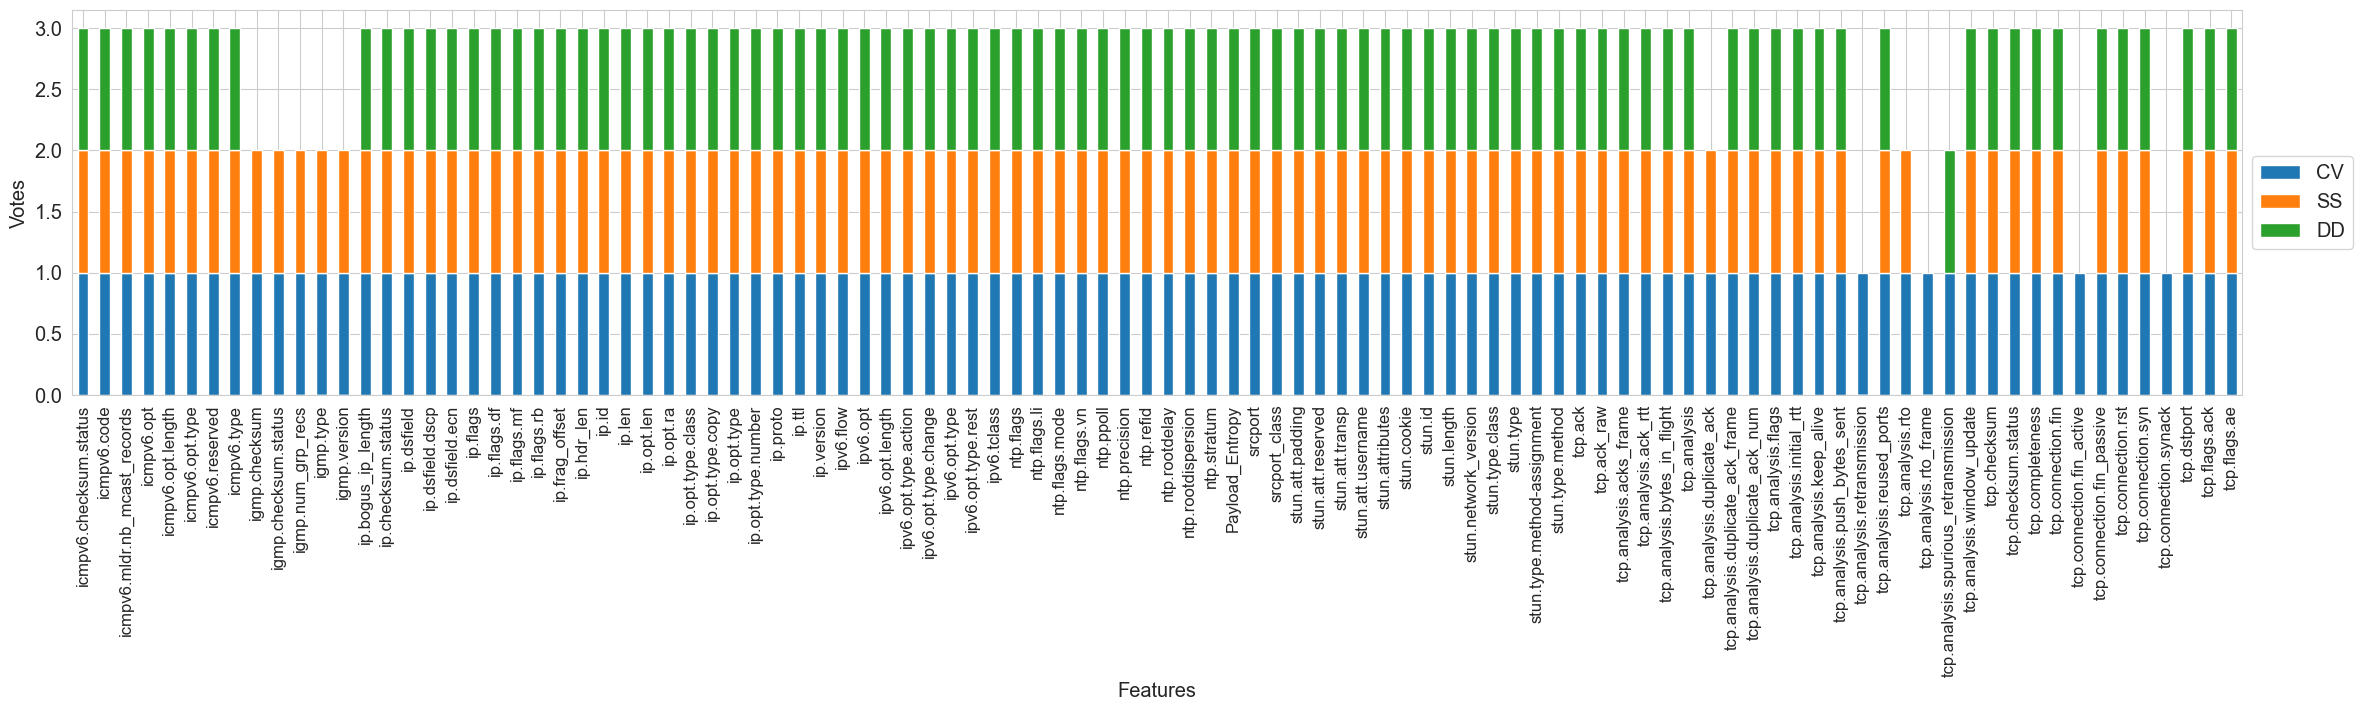

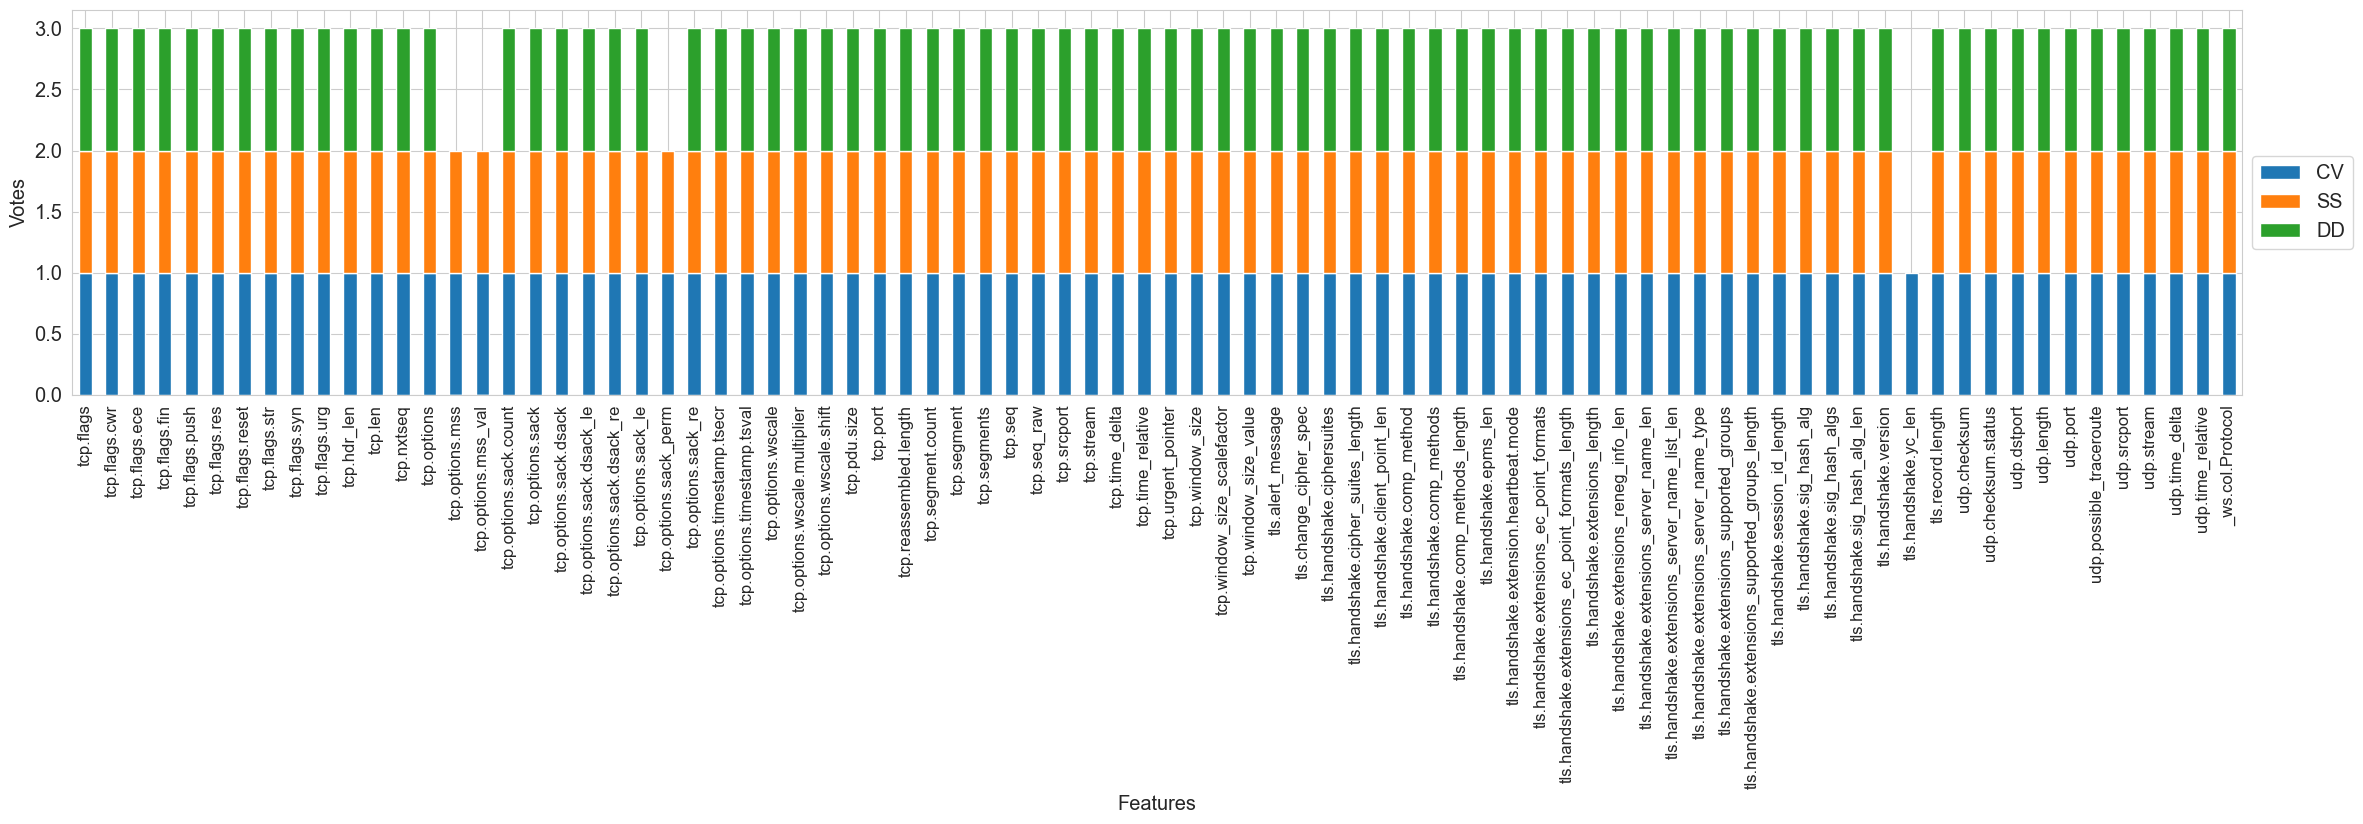

In [56]:
limit=0.00000001
for c in cleandf.columns[1:]:
    cleandf[c]=cleandf[c]>=limit
    cleandf[c]=cleandf[c].astype(int)
cleandf=cleandf.set_index("Feature")
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
graph_size=100
for size in range(0,len(cleandf),graph_size):
    graph_name=f"./pdfs/kappa_Voting3_{size}.PDF"
    df = cleandf.iloc[size:size+graph_size,:]
    df.plot.bar(stacked=True,figsize=(28,5))#,color=list(colors.values()))
    plt.xlabel('Features')
    plt.ylabel('Votes')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()

# 12 vote

# 12 Vote System

In [72]:
newnames={'CV-CS1D1':'CV-S1D1', 'CV-CS1D2':'CV-S1D2', 'CV-CS2D1': 'CV-S2D1', 'CV-CS2D2':'CV-S2D2', 
 
 'DD-DD1':"DD-S1D1S2D2",'DD-DD1T':"DD-S2D2S1D1", 'DD-DD2':"DD-S2D1S1D2", 'DD-DD2T':"DD-S1D2S2D1",
           'SS-SD1':'SS-S1S2D1', 'SS-SD1T':'SS-S2S1D1', 'SS-SD2':'SS-S1S2D2','SS-SD2T':'SS-S2S1D2'
         }


In [73]:
files_add=find_the_way("./results/mean",".csv")
files_add

['./results/mean\\CV\\CS1D1.csv',
 './results/mean\\CV\\CS1D2.csv',
 './results/mean\\CV\\CS2D1.csv',
 './results/mean\\CV\\CS2D2.csv',
 './results/mean\\DD\\DD1.csv',
 './results/mean\\DD\\DD1T.csv',
 './results/mean\\DD\\DD2.csv',
 './results/mean\\DD\\DD2T.csv',
 './results/mean\\SS\\SD1.csv',
 './results/mean\\SS\\SD1T.csv',
 './results/mean\\SS\\SD2.csv',
 './results/mean\\SS\\SD2T.csv']

In [74]:
files_add=['./results/mean\\CV\\CS1D1.csv',
 './results/mean\\CV\\CS1D2.csv',
 './results/mean\\CV\\CS2D1.csv',
 './results/mean\\CV\\CS2D2.csv',
 './results/mean\\SS\\SD1.csv',
 './results/mean\\SS\\SD1T.csv',
 './results/mean\\SS\\SD2.csv',
 './results/mean\\SS\\SD2T.csv',
           './results/mean\\DD\\DD1.csv',
 './results/mean\\DD\\DD1T.csv',
 './results/mean\\DD\\DD2.csv',
 './results/mean\\DD\\DD2T.csv']

In [75]:
flag=1
df12vote=pd.DataFrame()
for i in files_add:
    name=i.replace("\\","/")
    name=name.replace("/","-")
    name=name[15:-4]
    df=pd.read_csv(i,usecols=["Feature","kap"])
    if flag:
        df12vote["Feature"]=df["Feature"]
        flag=0
    del df["Feature"]
    df12vote[newnames[name]]=df["kap"]
df12vote


Feature   CV-S1D1   CV-S1D2   CV-S2D1   CV-S2D2  \
0    arp.duplicate-address-detected  0.000000  0.000000  0.000000  0.000000   
1       arp.duplicate-address-frame  0.000000  0.000000  0.000000  0.000000   
2                       arp.hw.size  0.000000  0.159336  0.067460  0.000000   
3                       arp.hw.type  0.000000  0.159345  0.067448  0.000000   
4                arp.isannouncement  0.045355  0.084409  0.032658  0.089685   
..                              ...       ...       ...       ...       ...   
342                  udp.time_delta  0.233781  0.354624  0.204326  0.380459   
343               udp.time_relative  0.174363  0.195064  0.267000  0.220067   
344              ws.col.Destination       NaN       NaN       NaN       NaN   
345                _ws.col.Protocol  0.263548  0.400204  0.183425  0.053698   
346                   ws.col.Source       NaN       NaN       NaN       NaN   

     SS-S1S2D1  SS-S2S1D1  SS-S1S2D2  SS-S2S1D2  DD-S1D1S2D2  DD-S2D2S1D1  \
0     0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
1     0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
2     0.000000   0.067269   0.103663   0.000000     0.000000     0.000000   
3     0.000000   0.067269   0.103663   0.000000     0.000000     0.000000   
4     0.033200   0.042440   0.085405   0.090173     0.010266     0.027307   
..         ...        ...        ...        ...          ...          ...   
342   0.153809   0.173455   0.335353   0.282556     0.041411     0.162422   
343   0.218971   0.214337   0.242244   0.224520     0.041079     0.142928   
344        NaN        NaN        NaN        NaN          NaN          NaN   
345   0.176593   0.262150   0.256560   0.074191     0.105946     0.030066   
346        NaN        NaN        NaN        NaN          NaN          NaN   

     DD-S2D1S1D2  DD-S1D2S2D1  
0       0.000000     0.000000  
1       0.000000     0.000000  
2       0.147167     0.037516  
3       0.147167     0.037516  
4       0.017600     0.031875  
..           ...          ...  
342     0.240189     0.176130  
343     0.221933     0.133135  
344          NaN          NaN  
345     0.173090     0.116854  
346          NaN          NaN  

[347 rows x 13 columns]

In [76]:
cols=list(df12vote.columns)[1:]
cleandf=[list(df12vote.columns)]
limit=0.00000001
for i in df12vote.values:
    flag=1
    if all(p != p for p in i[1:]):
        flag=0
    if all(v <= limit for v in i[1:]):
        flag=0

    if flag:
        cleandf.append(list(i))
cleandf = pd.DataFrame (cleandf[1:], columns = cleandf[0])   
print(len(cleandf))
cleandf

285


Feature   CV-S1D1   CV-S1D2   CV-S2D1   CV-S2D2  SS-S1S2D1  \
0           arp.hw.size  0.000000  0.159336  0.067460  0.000000   0.000000   
1           arp.hw.type  0.000000  0.159345  0.067448  0.000000   0.000000   
2    arp.isannouncement  0.045355  0.084409  0.032658  0.089685   0.033200   
3      arp.isgratuitous  0.045188  0.084473  0.032347  0.089178   0.033200   
4            arp.opcode  0.000000  0.129700  0.067450  0.000000   0.000000   
..                  ...       ...       ...       ...       ...        ...   
280         udp.srcport  0.374110  0.427491  0.458882  0.438349   0.408675   
281          udp.stream  0.323373  0.485256  0.379681  0.497922   0.004209   
282      udp.time_delta  0.233781  0.354624  0.204326  0.380459   0.153809   
283   udp.time_relative  0.174363  0.195064  0.267000  0.220067   0.218971   
284    _ws.col.Protocol  0.263548  0.400204  0.183425  0.053698   0.176593   

     SS-S2S1D1  SS-S1S2D2  SS-S2S1D2  DD-S1D1S2D2  DD-S2D2S1D1  DD-S2D1S1D2  \
0     0.067269   0.103663   0.000000     0.000000     0.000000     0.147167   
1     0.067269   0.103663   0.000000     0.000000     0.000000     0.147167   
2     0.042440   0.085405   0.090173     0.010266     0.027307     0.017600   
3     0.042440   0.085405   0.090173     0.010266     0.027307     0.017600   
4     0.067269   0.080641   0.000000     0.000000     0.000000     0.147167   
..         ...        ...        ...          ...          ...          ...   
280   0.381598   0.428861   0.359272     0.059041     0.129641     0.313401   
281   0.082589  -0.033116   0.062510    -0.017668     0.062298     0.126919   
282   0.173455   0.335353   0.282556     0.041411     0.162422     0.240189   
283   0.214337   0.242244   0.224520     0.041079     0.142928     0.221933   
284   0.262150   0.256560   0.074191     0.105946     0.030066     0.173090   

     DD-S1D2S2D1  
0       0.037516  
1       0.037516  
2       0.031875  
3       0.031875  
4       0.032934  
..           ...  
280     0.203790  
281     0.020039  
282     0.176130  
283     0.133135  
284     0.116854  

[285 rows x 13 columns]

In [77]:
colors={'CV-CS1D1':"#0049C6", 'CV-CS1D2':"#0069C6", 'CV-CS2D1':"#0099C6", 'CV-CS2D2':"#00A9C6", 
      
        'SS-SD1':"#FF5733", 'SS-SD1T':"#DA5733", 'SS-SD2':"#BF5733",'SS-SD2T':"#CF5733",  'DD-DD1':"#00A603",'DD-DD1T':"#00C603", 'DD-DD2':"#00E603", 'DD-DD2T':"#00F603"}

colors={
'CV-S1D1':"#0049C6",
 'CV-S1D2':"#0069C6",
 'CV-S2D1':"#0099C6",
 'CV-S2D2':"#00A9C6",
 'SS-S1S2D1':"#FF5733",
 'SS-S2S1D1':"#DA5733",
 'SS-S1S2D2':"#BF5733",
 'SS-S2S1D2':"#CF5733", 'DD-S1D1S2D2':"#00A603",
 'DD-S2D2S1D1':"#00C603",
 'DD-S2D1S1D2':"#00E603",
 'DD-S1D2S2D1':"#00F603"}

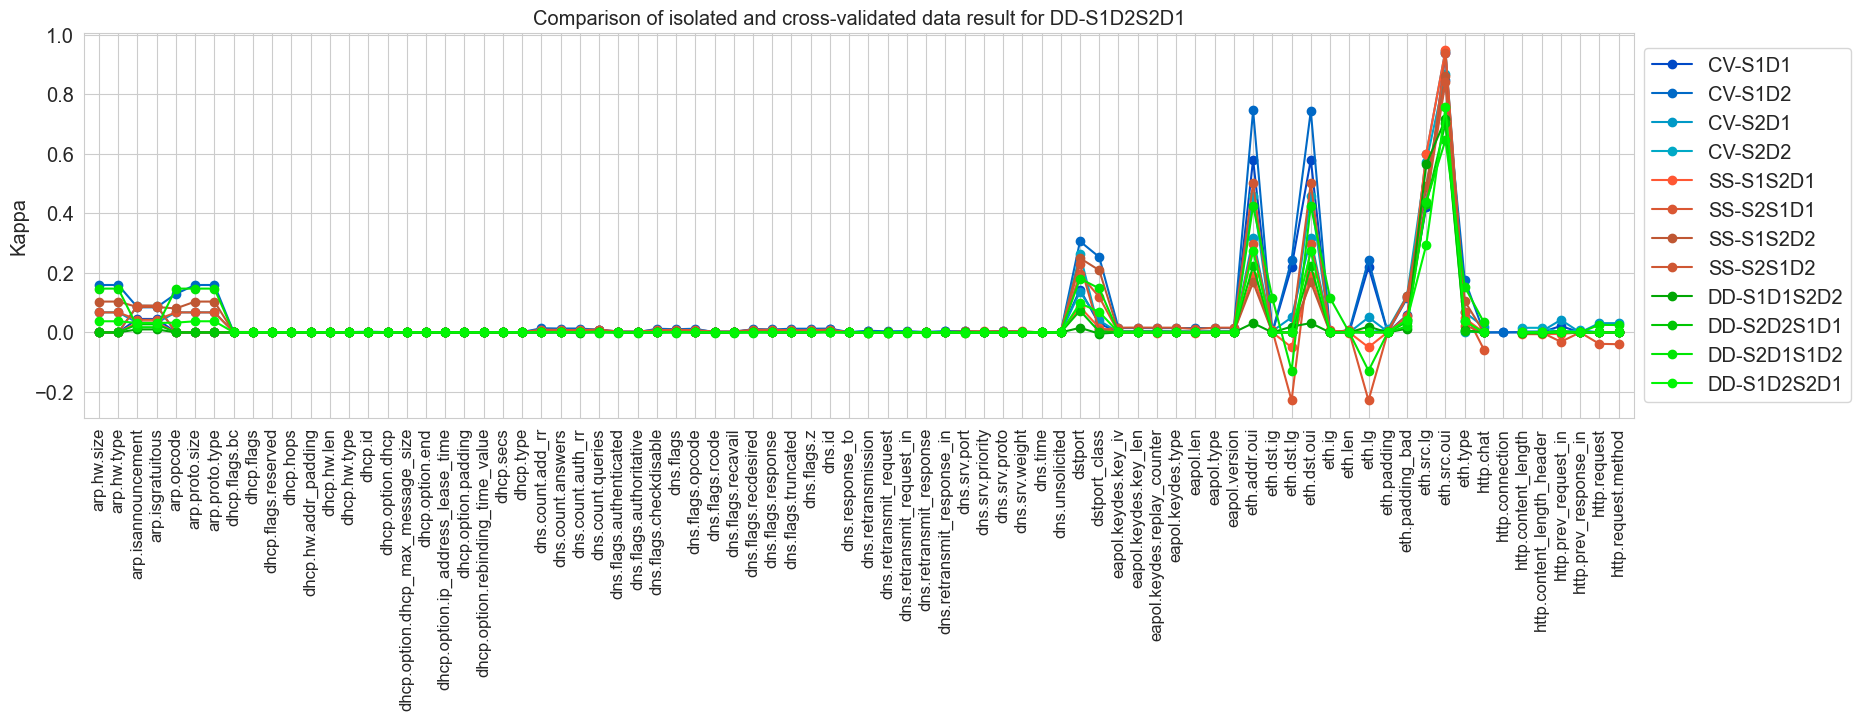

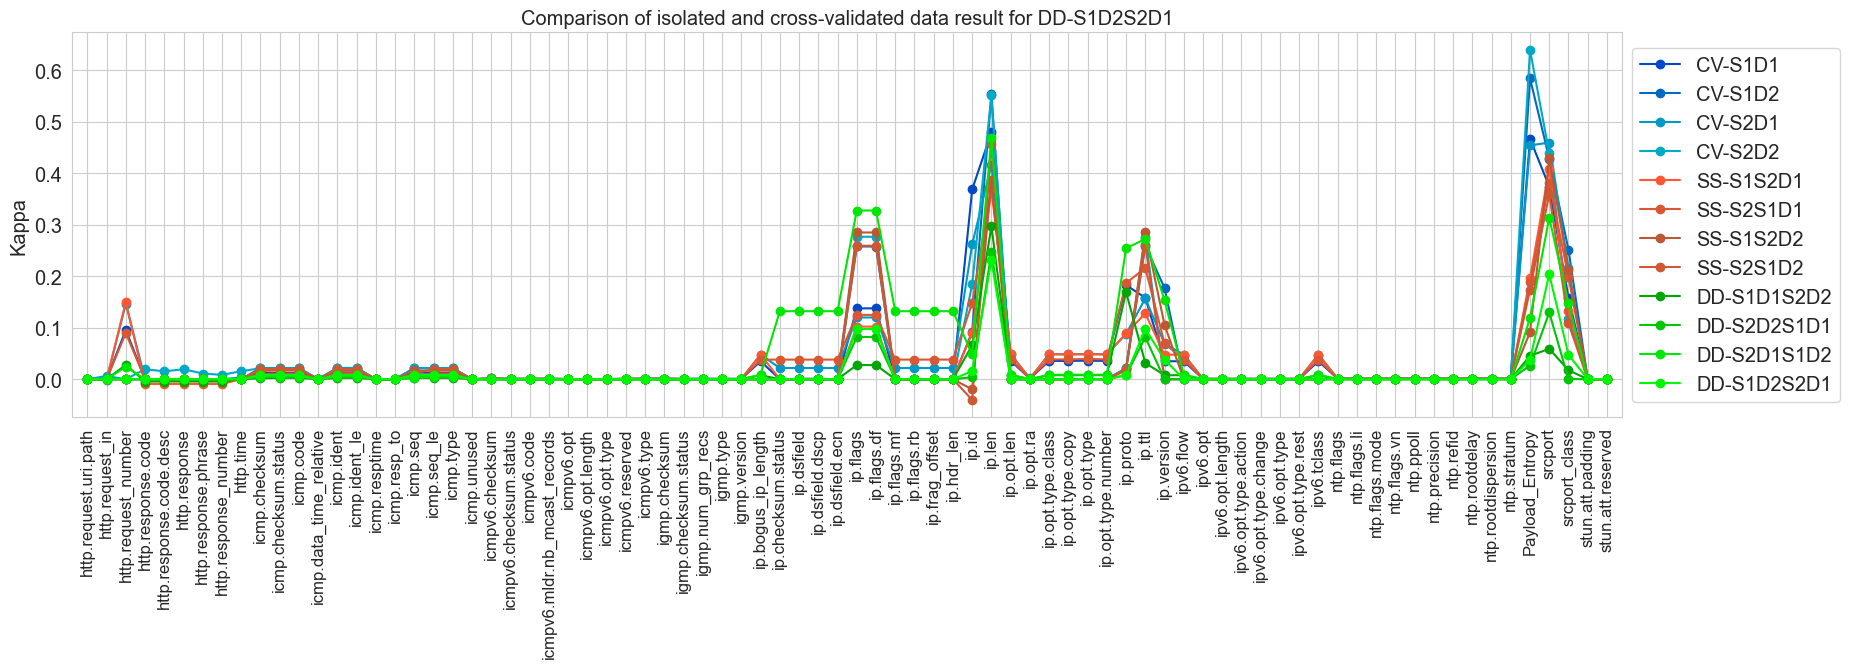

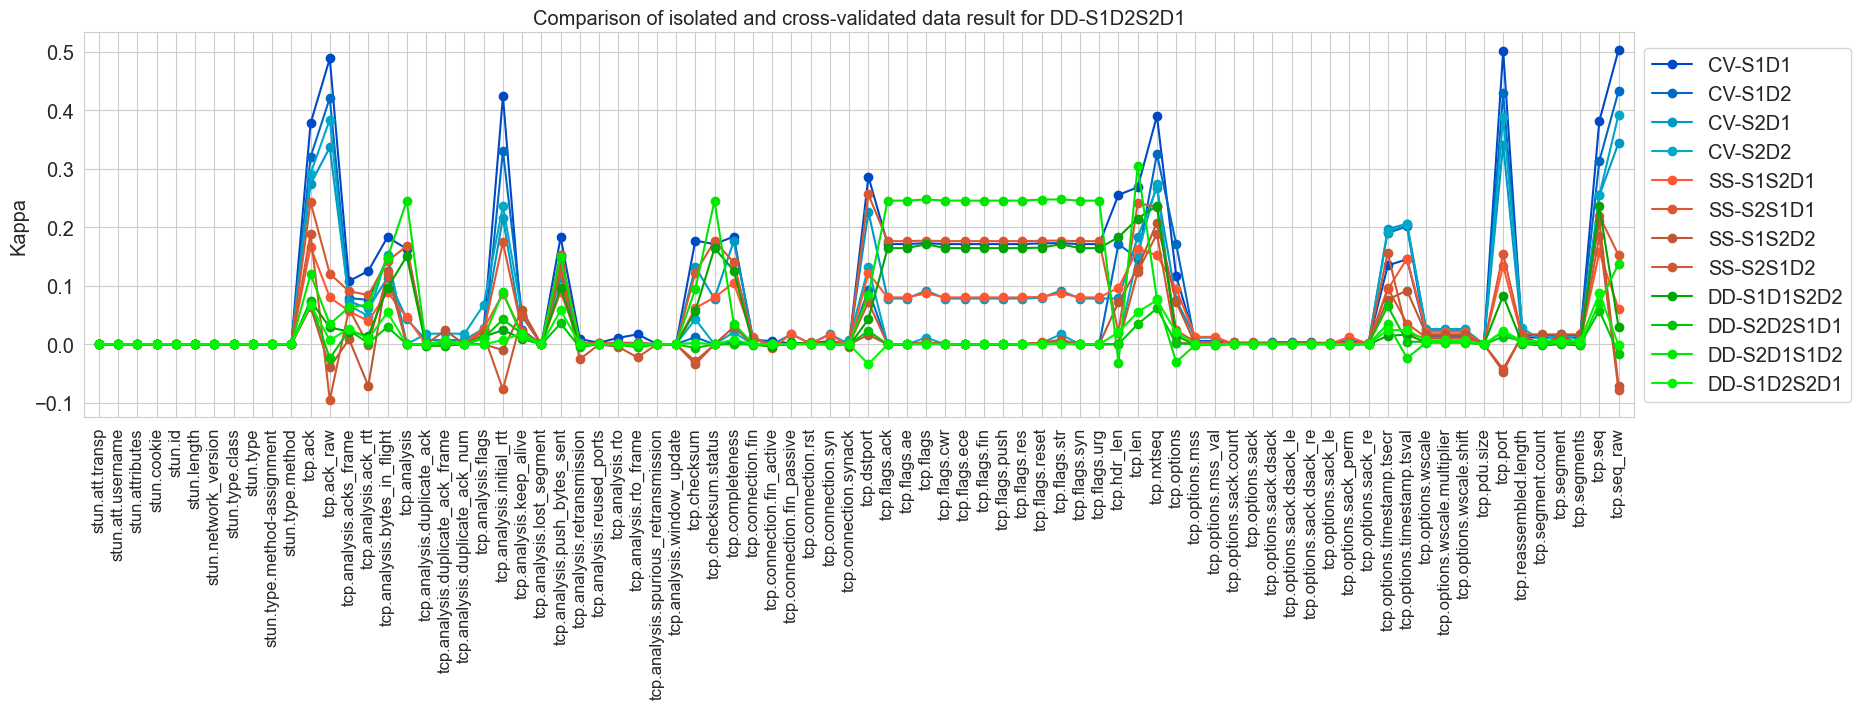

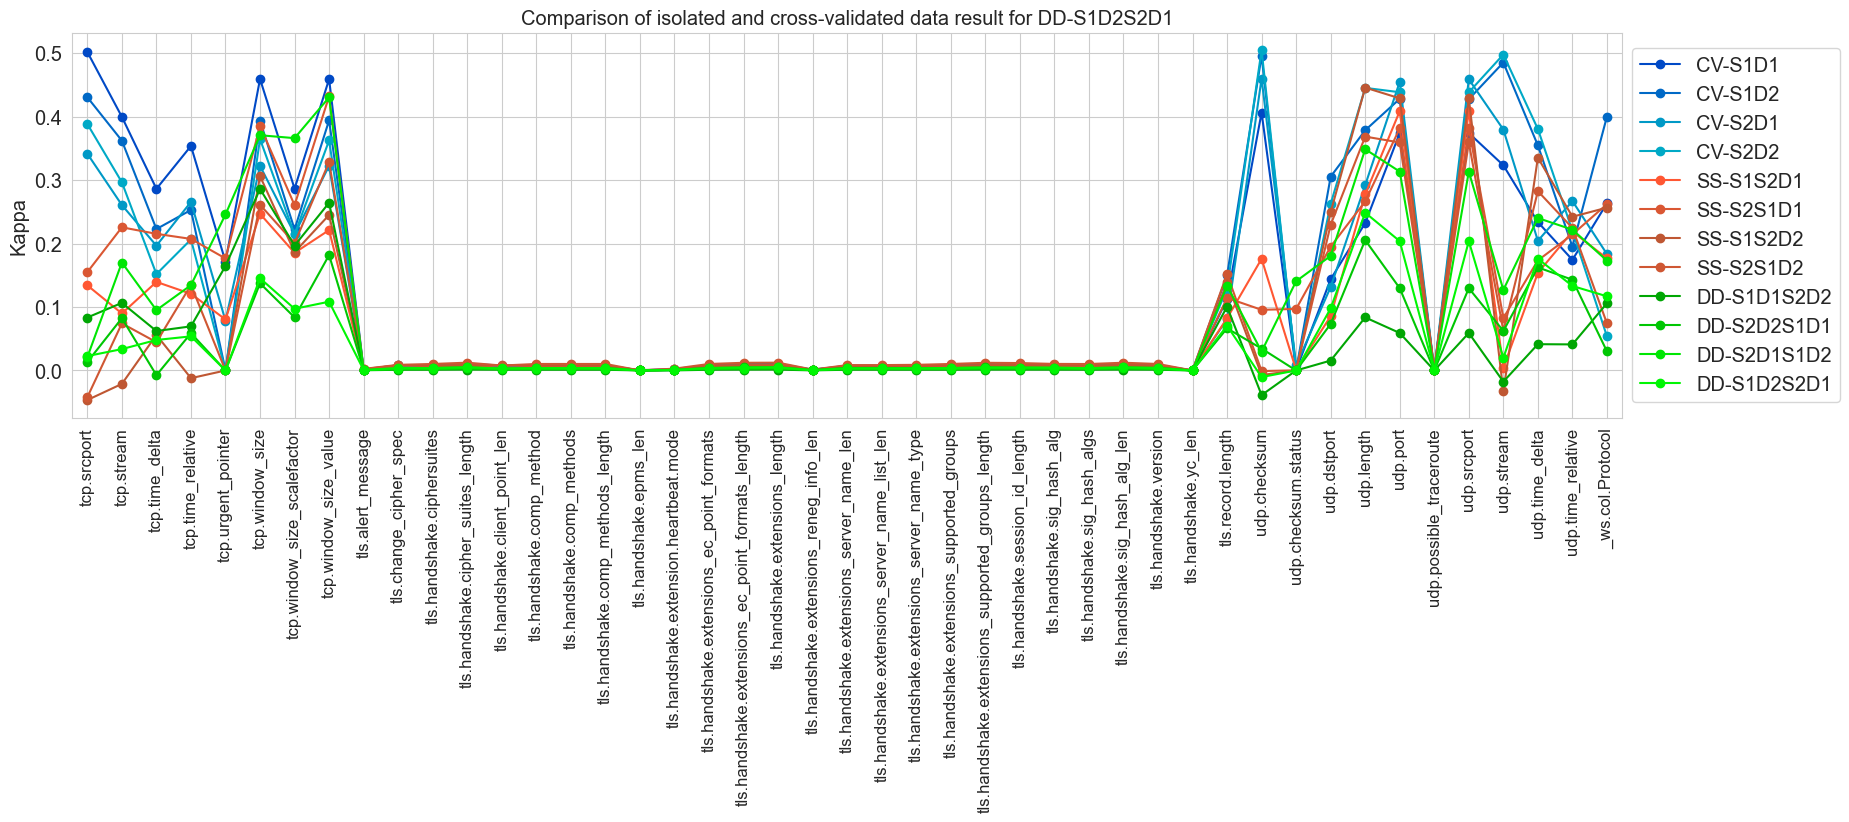

In [78]:
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
import matplotlib.pylab as pylab
sns.set_style("whitegrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'x-large'}
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
graph_size=80
for size in range(0,len(cleandf),graph_size):
    graph_name=f"./pdfs/kappa_line_12_{size}.PDF"
    df = cleandf.iloc[size:size+graph_size,:]
    for i in cols: 
            plt.margins(x=0.01)
            my_xticks=df["Feature"]#list(iso.index)
            pylab.rcParams.update(params)
            #plt.figure(figsize=(10,10))
            #plt.plot(my_xticks,iso['Acc'], linestyle='--', marker='.', color='b',label= "Separate Train & Test acc")
            #plt.plot(my_xticks,cv['Acc'], linestyle='--', marker='.', color='r',label= "10-Fold CV acc")
            plt.plot(my_xticks,df[i], linestyle='-', marker='o',color=colors[i],label= i)
    plt.title(f"Comparison of isolated and cross-validated data result for {i}")
    plt.legend(numpoints=1)
    #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.ylabel("Kappa")
    plt.xticks(rotation=90) 
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.ylim([0.69, 0.71]) 
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()
    
    

In [79]:
cleandf.head(60)

Feature   CV-S1D1   CV-S1D2   CV-S2D1   CV-S2D2  \
0                         arp.hw.size  0.000000  0.159336  0.067460  0.000000   
1                         arp.hw.type  0.000000  0.159345  0.067448  0.000000   
2                  arp.isannouncement  0.045355  0.084409  0.032658  0.089685   
3                    arp.isgratuitous  0.045188  0.084473  0.032347  0.089178   
4                          arp.opcode  0.000000  0.129700  0.067450  0.000000   
5                      arp.proto.size  0.000000  0.159340  0.067451  0.000000   
6                      arp.proto.type  0.000000  0.159347  0.067445  0.000000   
7                       dhcp.flags.bc  0.001411  0.001211  0.000958  0.000535   
8                          dhcp.flags  0.001335  0.001213  0.000958  0.000615   
9                 dhcp.flags.reserved  0.001218  0.001185  0.000819  0.000595   
10                          dhcp.hops  0.001217  0.001183  0.000818  0.000387   
11               dhcp.hw.addr_padding  0.001217  0.001186  0.000819  0.000540   
12                        dhcp.hw.len  0.001217  0.001186  0.000818  0.000552   
13                       dhcp.hw.type  0.001217  0.001184  0.000819  0.000553   
14                            dhcp.id  0.002041  0.001924  0.001205  0.000967   
15                   dhcp.option.dhcp  0.001236  0.001185  0.000819  0.000362   
16  dhcp.option.dhcp_max_message_size  0.000548  0.000929  0.000256  0.000061   
17                    dhcp.option.end  0.001217  0.001185  0.000818  0.000540   
18  dhcp.option.ip_address_lease_time  0.000025  0.000000  0.000000  0.000000   
19                dhcp.option.padding  0.001080  0.000378  0.000798  0.000511   
20   dhcp.option.rebinding_time_value  0.000025  0.000000  0.000000  0.000000   
21                          dhcp.secs  0.001270  0.001212  0.000819  0.000527   
22                          dhcp.type  0.001235  0.001184  0.000819  0.000540   
23                   dns.count.add_rr  0.009503  0.014015  0.004428  0.000000   
24                  dns.count.answers  0.009085  0.013128  0.004645  0.000539   
25                  dns.count.auth_rr  0.008412  0.013204  0.004100  0.000000   
26                  dns.count.queries  0.009414  0.009015  0.004964  0.006725   
27            dns.flags.authenticated  0.003114  0.000000  0.001107  0.000000   
28            dns.flags.authoritative  0.003115  0.000000  0.001106  0.000000   
29             dns.flags.checkdisable  0.008129  0.012462  0.002032  0.000000   
30                          dns.flags  0.009564  0.010823  0.004731  0.005850   
31                   dns.flags.opcode  0.008130  0.012462  0.002033  0.000000   
32                    dns.flags.rcode  0.003114  0.000000  0.001107  0.000000   
33                 dns.flags.recavail  0.003114  0.000000  0.001107  0.000000   
34               dns.flags.recdesired  0.009563  0.011573  0.004728  0.005846   
35                 dns.flags.response  0.008128  0.010012  0.004344  0.000000   
36                dns.flags.truncated  0.008131  0.012467  0.002034  0.000000   
37                        dns.flags.z  0.008131  0.012463  0.002034  0.000000   
38                             dns.id  0.010135  0.012965  0.004706  0.005968   
39                    dns.response_to  0.000474  0.000865  0.000160  0.000095   
40                 dns.retransmission  0.003865  0.005637  0.001459  0.000000   
41             dns.retransmit_request  0.001433  0.003637  0.000561  0.000000   
42          dns.retransmit_request_in  0.001982  0.004582  0.000805  0.000572   
43            dns.retransmit_response  0.002431  0.000000  0.000897  0.000000   
44         dns.retransmit_response_in  0.003248  0.003616  0.001190  0.000476   
45                       dns.srv.port  0.003578  0.004095  0.001778  0.000000   
46                   dns.srv.priority  0.002691  0.000000  0.001780  0.000000   
47                      dns.srv.proto  0.004713  0.003976  0.002186  0.000000   
48                     dns.srv.weight  0.002689  0.000000  0.

# Voting

In [80]:
#cleandf=df12vote

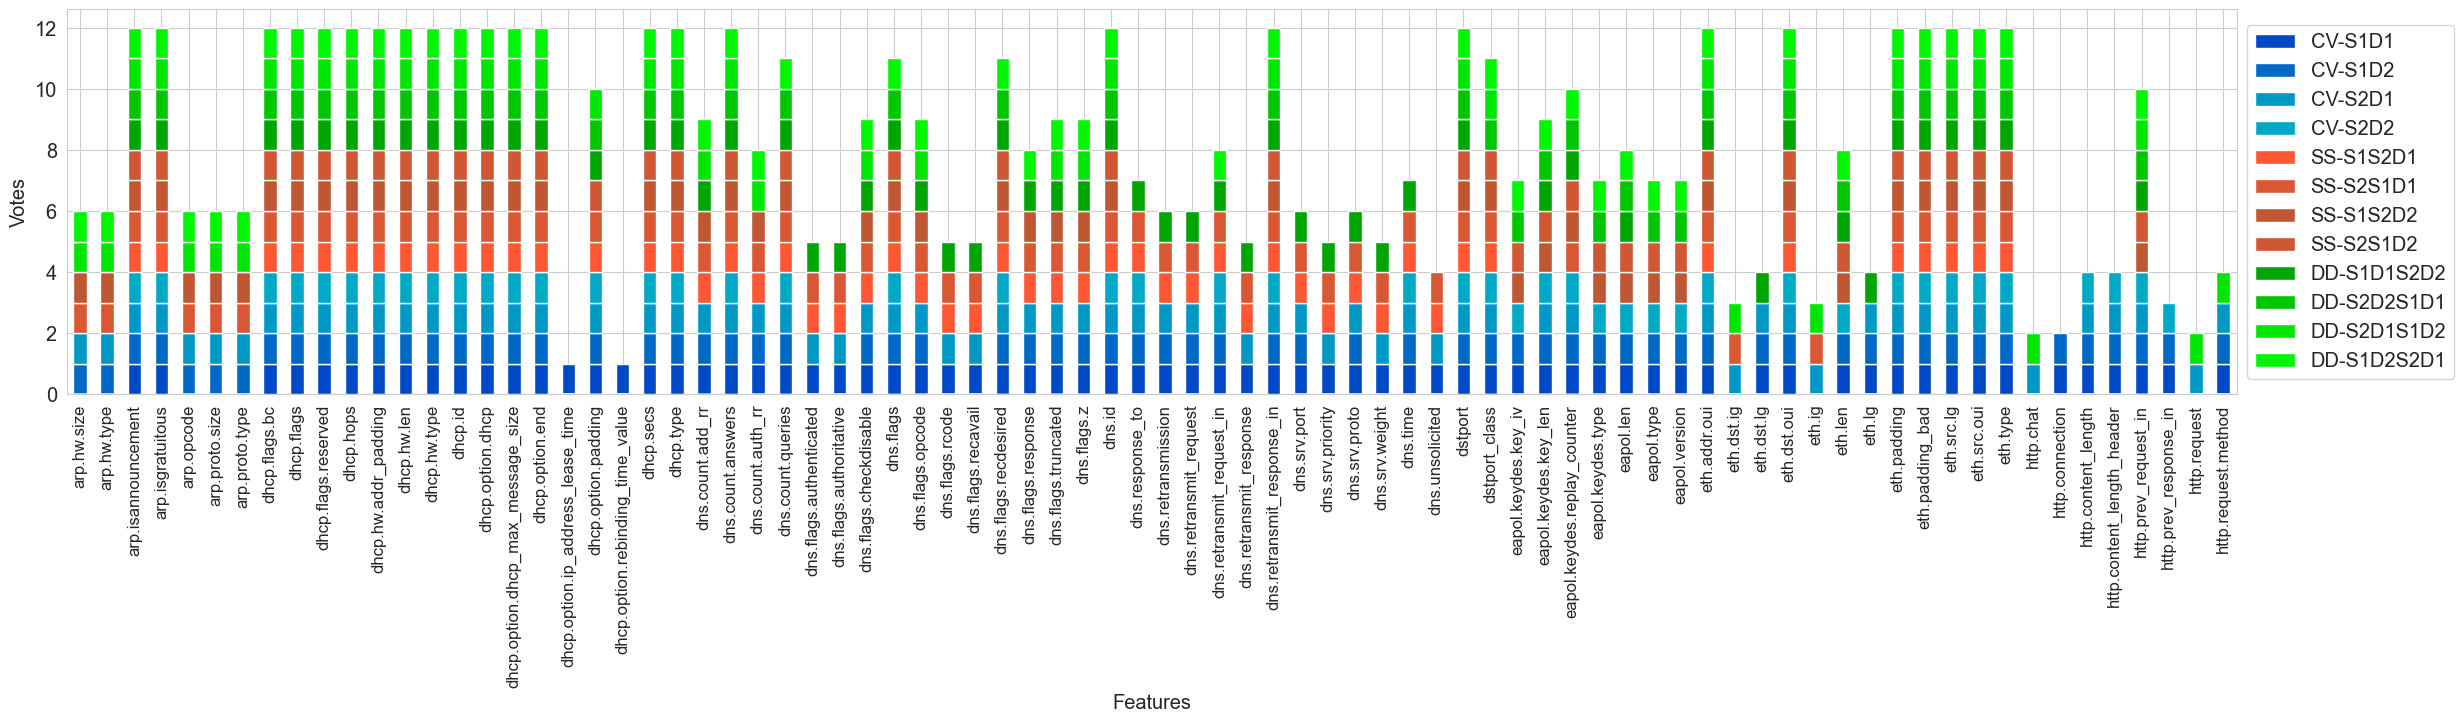

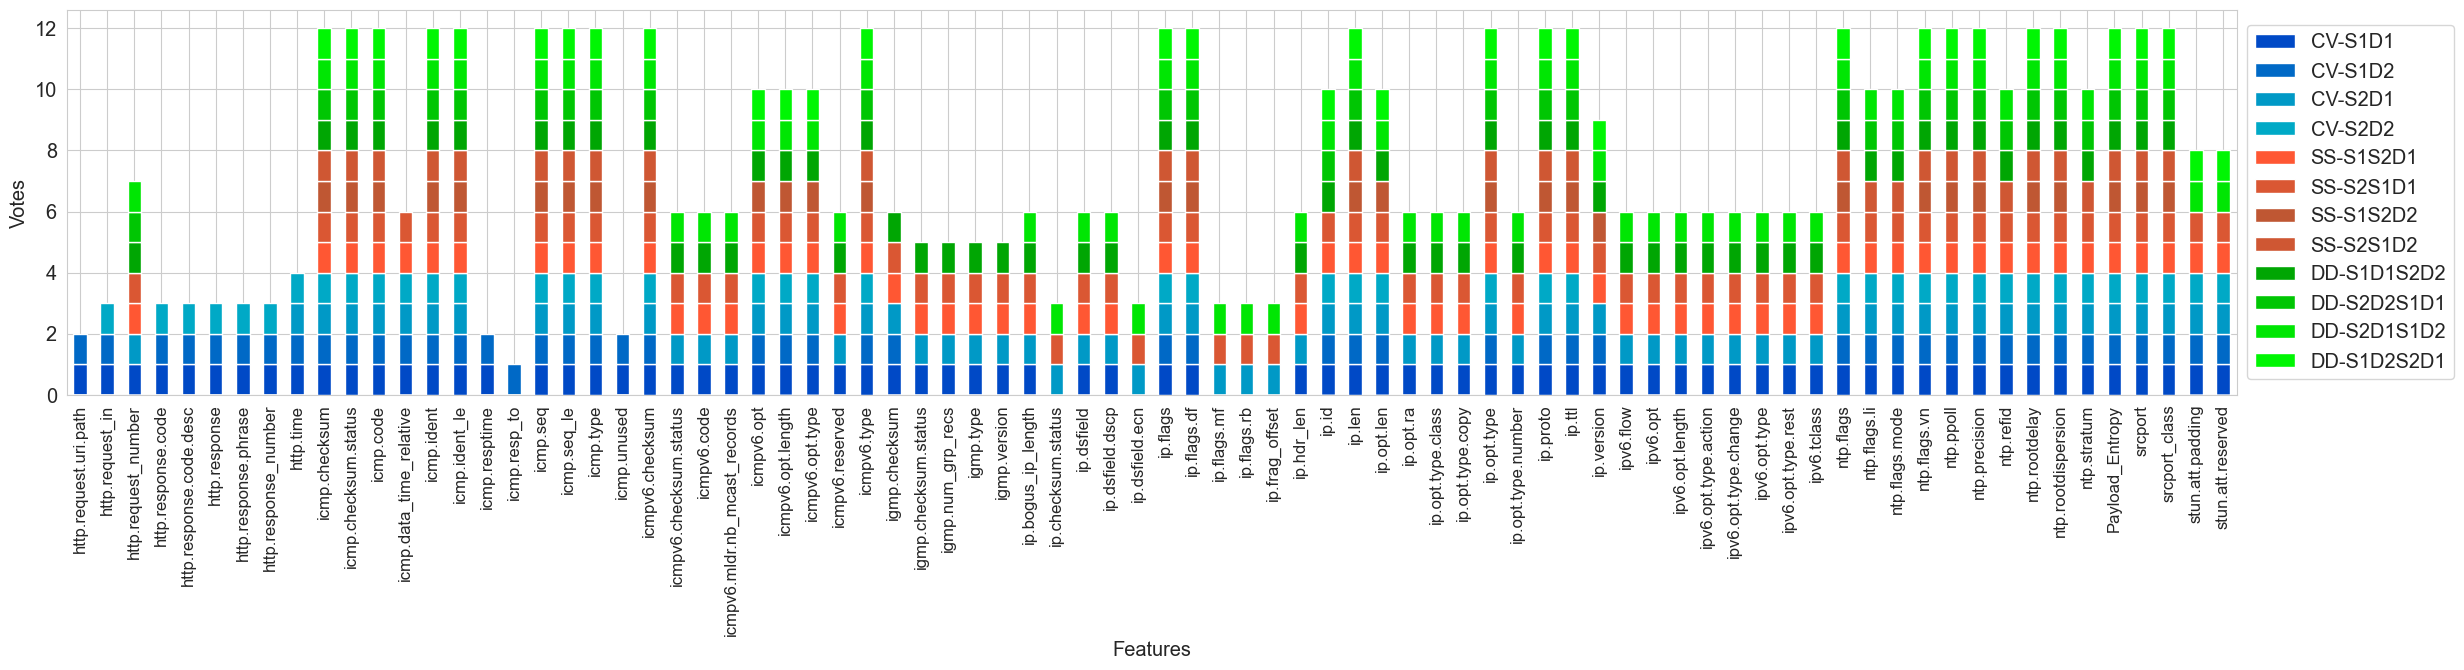

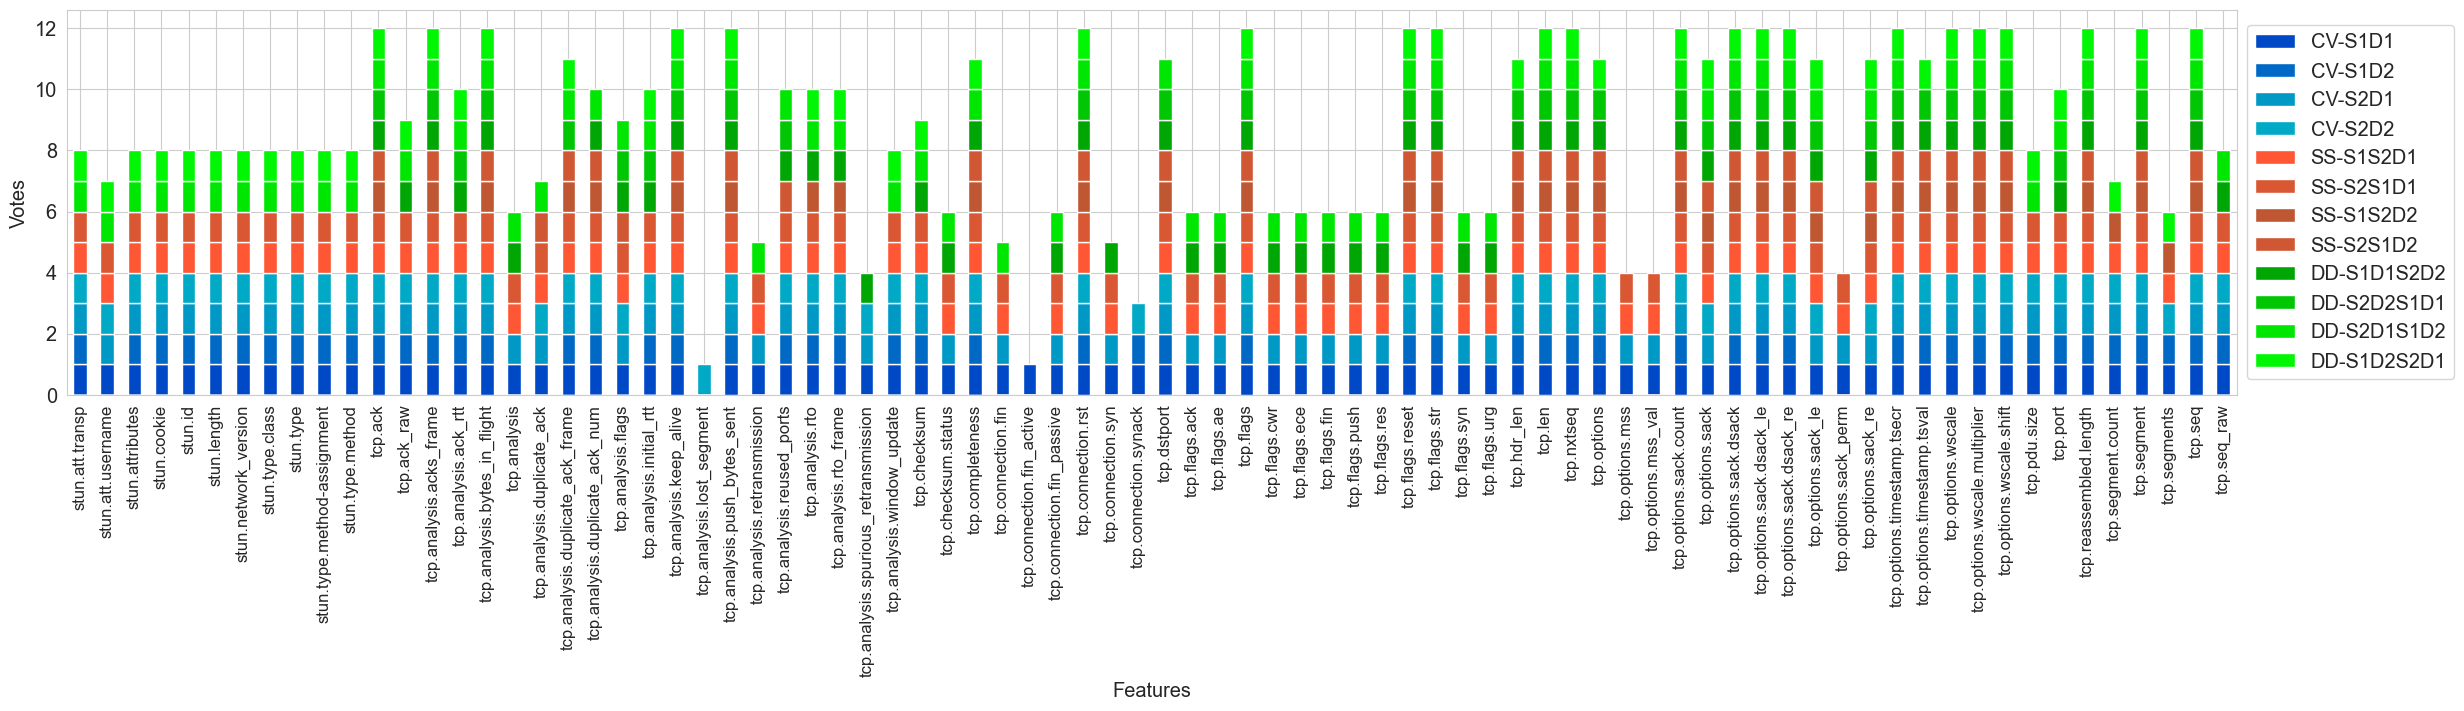

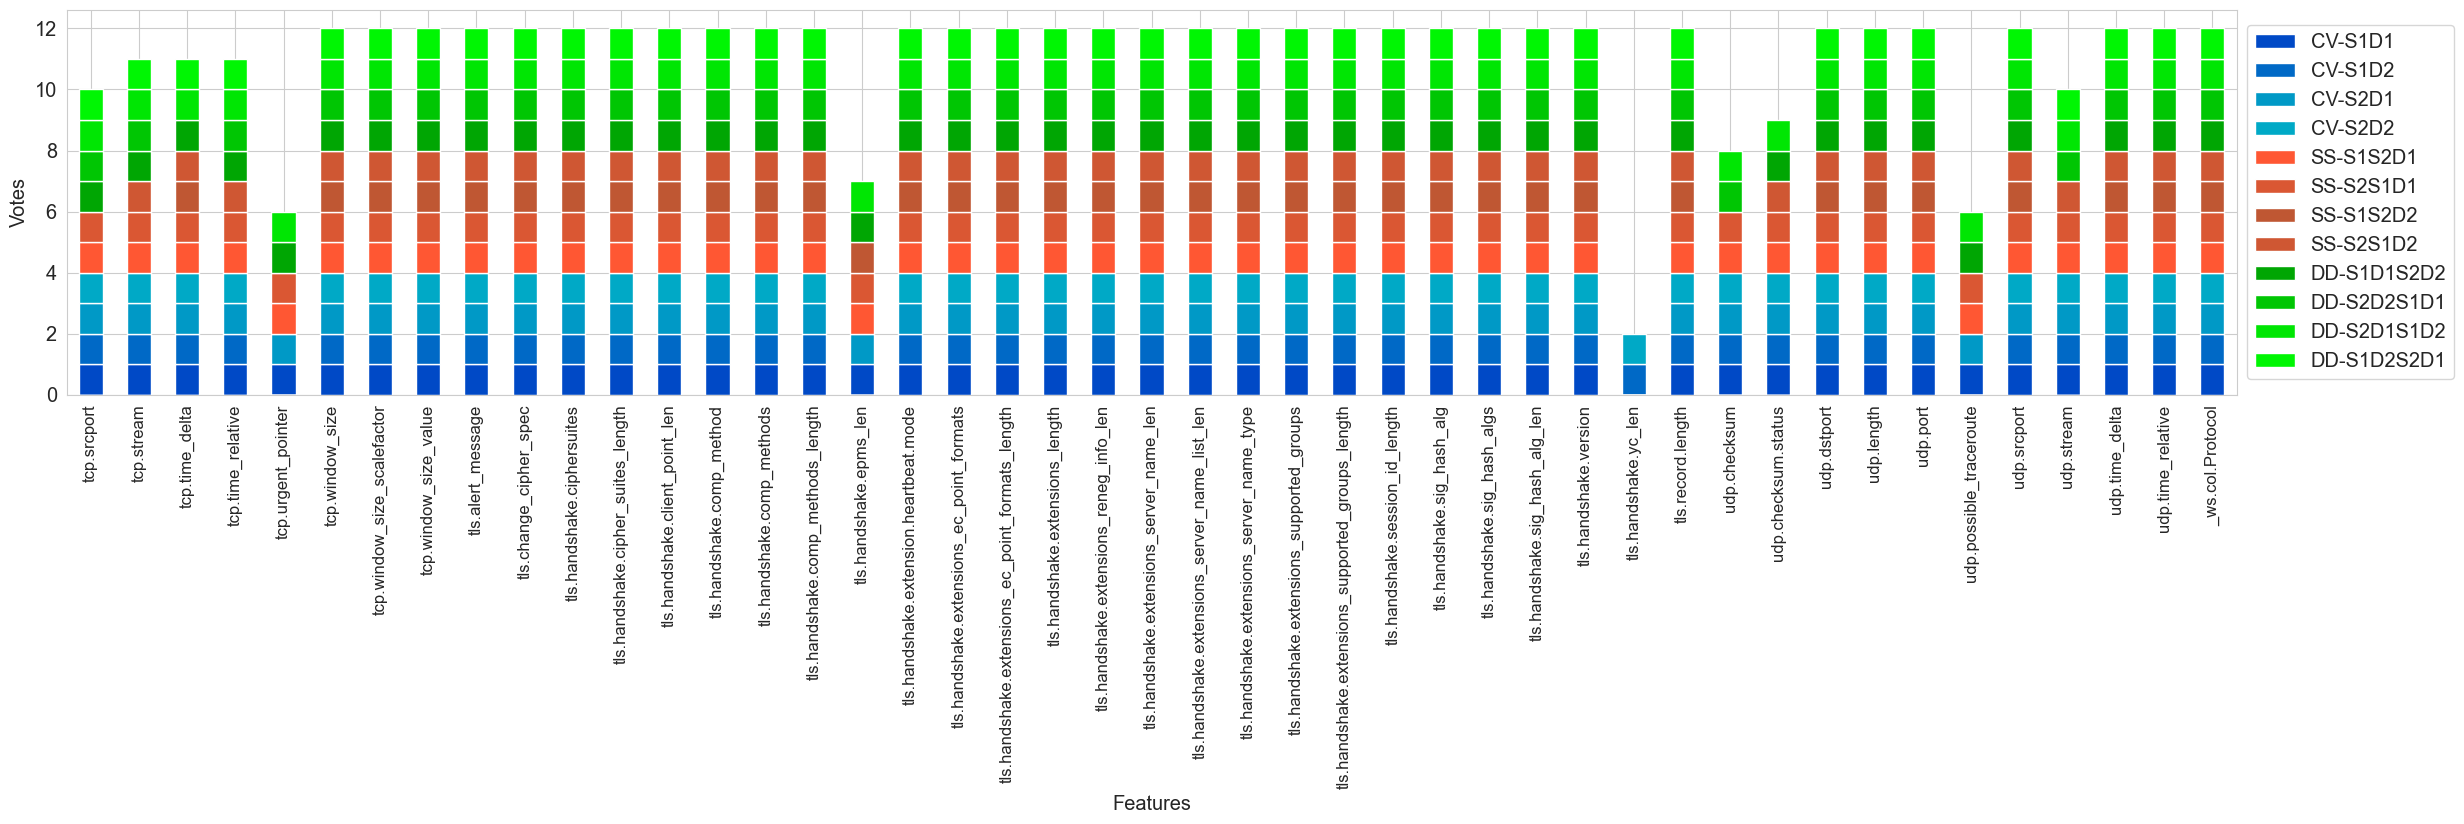

In [81]:
limit=0.00000001
for c in cleandf.columns[1:]:
    cleandf[c]=cleandf[c]>=limit
    cleandf[c]=cleandf[c].astype(int)
cleandf=cleandf.set_index("Feature")

graph_size=80
for size in range(0,len(cleandf),graph_size):
    graph_name=f"./pdfs/kappa_Voting12_{size}.PDF"
    df = cleandf.iloc[size:size+graph_size,:]
    df.plot.bar(stacked=True,figsize=(28,5),color=list(colors.values()))
    plt.xlabel('Features')
    plt.ylabel('Votes')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()

In [82]:
evalauated_features=[]
GA_input_features=[]
for ii,i in enumerate(cleandf.values):

    temp=sum(i[-4:])
    if temp:
        temp=sum(i[-8:])
        if temp>3:
            evalauated_features.append(1)
        else:
            evalauated_features.append(0)
    else:
        evalauated_features.append(0)
    print(cleandf.index[ii],i,evalauated_features[ii])
    if evalauated_features[ii]:
        GA_input_features.append(cleandf.index[ii])
        

arp.hw.size [0 1 1 0 0 1 1 0 0 0 1 1] 1
arp.hw.type [0 1 1 0 0 1 1 0 0 0 1 1] 1
arp.isannouncement [1 1 1 1 1 1 1 1 1 1 1 1] 1
arp.isgratuitous [1 1 1 1 1 1 1 1 1 1 1 1] 1
arp.opcode [0 1 1 0 0 1 1 0 0 0 1 1] 1
arp.proto.size [0 1 1 0 0 1 1 0 0 0 1 1] 1
arp.proto.type [0 1 1 0 0 1 1 0 0 0 1 1] 1
dhcp.flags.bc [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.flags [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.flags.reserved [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.hops [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.hw.addr_padding [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.hw.len [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.hw.type [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.id [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.option.dhcp [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.option.dhcp_max_message_size [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.option.end [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.option.ip_address_lease_time [1 0 0 0 0 0 0 0 0 0 0 0] 0
dhcp.option.padding [1 1 1 1 1 1 0 1 1 1 1 0] 1
dhcp.option.rebinding_time_value [1 0 0 0 0 0 0 0 0 0 0 0] 0
dhcp.secs [1 1 1 1 1 1 1 1 1 1 1 1] 1
dhcp.type 

In [83]:
(GA_input_features)

['arp.hw.size',
 'arp.hw.type',
 'arp.isannouncement',
 'arp.isgratuitous',
 'arp.opcode',
 'arp.proto.size',
 'arp.proto.type',
 'dhcp.flags.bc',
 'dhcp.flags',
 'dhcp.flags.reserved',
 'dhcp.hops',
 'dhcp.hw.addr_padding',
 'dhcp.hw.len',
 'dhcp.hw.type',
 'dhcp.id',
 'dhcp.option.dhcp',
 'dhcp.option.dhcp_max_message_size',
 'dhcp.option.end',
 'dhcp.option.padding',
 'dhcp.secs',
 'dhcp.type',
 'dns.count.add_rr',
 'dns.count.answers',
 'dns.count.auth_rr',
 'dns.count.queries',
 'dns.flags.checkdisable',
 'dns.flags',
 'dns.flags.opcode',
 'dns.flags.recdesired',
 'dns.flags.response',
 'dns.flags.truncated',
 'dns.flags.z',
 'dns.id',
 'dns.retransmit_request_in',
 'dns.retransmit_response_in',
 'dstport',
 'dstport_class',
 'eapol.keydes.key_iv',
 'eapol.keydes.key_len',
 'eapol.keydes.replay_counter',
 'eapol.keydes.type',
 'eapol.len',
 'eapol.type',
 'eapol.version',
 'eth.addr.oui',
 'eth.dst.oui',
 'eth.len',
 'eth.padding',
 'eth.padding_bad',
 'eth.src.lg',
 'eth.src.oui'

In [84]:
len(GA_input_features)

223

In [85]:
import pickle


with open('GA_input_features.pickle', 'wb') as handle:
    pickle.dump(GA_input_features, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('GA_input_features.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(GA_input_features == b)

True
